In [251]:
#Basic modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import operator
from pandas.api.types import is_numeric_dtype

#suppress display of warnings
import warnings
warnings.filterwarnings('ignore')

# display all dataframe rows
pd.options.display.max_rows = None

# display all dataframe columns
pd.options.display.max_columns = None


#Preprocessing modules
from sklearn.impute import KNNImputer
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.utils import resample
from scipy.stats import randint as sp_randint

#splitting the data
from sklearn.model_selection import train_test_split

#Grid modules
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

#Supervised modules
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Metrics
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import f1_score,recall_score,precision_score
from scipy.stats import pearsonr
from sklearn.model_selection import LeaveOneOut


## `1. Import and explore the data.`

In [194]:
#Importing
Given_df = pd.read_csv("signal-data.csv")

In [131]:
#Random rows
Given_df.sample(3)

Time        0        1          2          3       4  \
301   2008-08-19 11:11:00  3052.43  2486.48  2201.5777   976.4791  0.7679   
938   2008-09-20 05:25:00  3059.09  2555.69  2060.6600  1410.3599  3.8894   
1427  2008-08-10 17:14:00  3003.43  2448.34  2205.5000  1287.3538  2.3842   

          5         6       7       8       9      10      11        12   13  \
301   100.0   99.9956  0.1202  1.2921 -0.0108 -0.0020  0.9731  199.7613  0.0   
938   100.0   96.6256  0.1181  1.5569  0.0095  0.0007  0.9707  197.4261  0.0   
1427  100.0  111.7644  0.1241  1.4339  0.0020 -0.0036  0.9775  195.2903  0.0   

           14        15       16      17        18       19      20       21  \
301    9.0687  409.9535   9.8492  0.9779  189.9121  12.4496  1.4108 -6294.25   
938    6.3965  402.1375  10.0085  0.9821  187.4176  12.4978  1.4193 -5437.00   
1427  12.2690  411.9367  10.6410  0.9839  184.6493  12.5914  1.3970 -5432.25   

           22       23         24      25      26      27       28      29  \
301   3013.00 -3111.75  1574.0000  0.9838  1.8905  5.1000  66.7111  2.7000   
938   2602.75 -4097.50   911.3333  1.2648  1.9795  7.2763  70.1222  2.0111   
1427  2548.50 -6617.50  -213.7500  1.3068  1.9860  7.3675  67.7222  2.7889   

          30      31       32      33       34       35       36       37  \
301   0.2033  4.6417  85.1712  8.5405  50.2488  64.1314  49.7512  66.2364   
938   0.1591  3.3518  83.7179  8.7015  50.6219  64.4228  49.3782  66.2507   
1427  0.1950  3.5059  86.8862  8.9541  50.6555  63.9146  49.3445  66.4190   

           38        39     40     41    42        43       44        45  \
301   86.8378  118.4904  76.57  3.732  70.0  350.4355  10.2589  124.0973   
938   86.2732  118.5040  80.86  2.617  70.0  354.8455  10.1186  127.4127   
1427  86.2871  119.0282  81.86  2.962  70.0  347.0300  10.0084  144.1127   

            46      47        48   49        50        51   52     53     54  \
301   711.3808  1.4252  143.4555  1.0  617.9882  211.3636  0.0  4.594  4.830   
938   720.5629  1.3591  142.3945  1.0  624.6527  186.7446  0.0  4.602  4.845   
1427  735.4371  1.3038  140.9273  1.0  632.0700  205.5773  0.0  4.605  4.866   

          55      56      57      58       59        60       61        62  \
301   2828.0  0.9354  0.9511  4.6871  22.3736  348.1755  10.6192  106.4709   
938   2839.0  0.9315  0.9498  4.6322   5.1136  354.0091  10.3973  112.5264   
1427  2820.0  0.9312  0.9463  4.5909  -5.8273  352.1218  10.3873  118.2855   

           63       64       65        66      67        68   69        70  \
301   13.1655  17.6264  25.0342  686.3466  0.9991  150.1764  1.0  604.8227   
938   11.4591  14.8864  20.9755  699.5875  0.9822  146.6582  1.0  613.1936   
1427  22.6591  25.8273  32.6759  702.7612  0.8801  139.0036  1.0  609.4109   

            71        72        73   74      75      76      77      78  \
301   100.5315  137.3836  467.4391  0.0 -0.0082 -0.0329  0.0017 -0.0475   
938   100.9970       NaN       NaN  0.0  0.0106  0.0078 -0.0274  0.0348   
1427   82.0727       NaN       NaN  0.0 -0.0245 -0.0199 -0.0475  0.0077   

          79      80      81      82      83      84      85      86      87  \
301   0.0119 -0.1016 -0.0256  0.0377  7.6796  0.1254     NaN  2.3908  0.9869   
938  -0.0071 -0.0033 -0.0150 -0.0040  6.5012  0.1255  0.1162  2.4190  0.9639   
1427  0.0061  0.0138 -0.0867  0.0178  8.5507  0.1328     NaN  2.4042  0.9721   

             88      89         90      91      92      93      94      95  \
301   1769.1164  0.1987  8964.5300 -0.0105  0.0003 -0.0004  0.0001  0.0000   
938   1668.0622  0.1590  9409.4801 -0.1242  0.0032  0.0008  0.0000  0.0000   
1427  1893.7174  0.1816  9292.7699  0.0085  0.0024 -0.0006  0.0001  0.0001   

          96   97      98      99     100     101     102     103     104  \
301  -0.1228  0.0  0.2478 -0.0130  0.0000  0.0001 -0.0120 -0.0084  0.0002   
938   0.1477  0.0 -0.2973 -0.0363  0.0000  0.0001  0.0341 -0.0121  0.0005   
1427 -0.1638  0.0  0.3632  0.0

In [4]:
#Shape, Size
Given_df.shape, Given_df.size

((1567, 592), 927664)

- We have 1567 records with 592 attributes here
- 591 feature variables plus 1 target variable

In [168]:
#Future Data
FutureData = pd.read_excel("Future_predictions.xlsx")

In [133]:
#Random sample
FutureData.sample(3)

Time        0        1          2          3       4    5  \
3  2008-07-19 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204  100   
12 2008-07-20 03:35:00  2920.07  2507.40  2195.1222  1046.1468  1.3204  100   
8  2008-07-19 20:24:00  2967.68  2600.47  2248.9000  1004.4692  0.7884  100   

           6       7       8       9      10      11        12  13       14  \
3   104.2367  0.1217  1.4882 -0.0124 -0.0033  0.9629  201.8482   0   9.6052   
12  103.3400  0.1223  1.5310 -0.0259  0.0216  0.9595  202.1269   0   8.4828   
8   106.2400  0.1185  1.5358  0.0111 -0.0066  0.9494  202.4544   0  12.6837   

          15      16      17        18       19      20       21       22  \
3   422.2894  9.6924  0.9687  192.1557  12.4782  1.4011 -5468.25  2648.25   
12  415.5185  9.5007  0.9666  192.6261  12.4186  1.3848 -5521.25  2592.75   
8   417.6009  9.7046  0.9693  192.7498  12.5263  1.4278 -4196.50  2059.50   

         23       24      25      26      27       28      29      30      31  \
3  -4515.00 -1657.25  1.3137  2.0038  7.3145  62.9333  2.6444  0.2071  3.3813   
12 -3982.25 -1933.25  1.3045  2.0107  7.4027  63.3778  2.8222  0.2383  3.5298   
8  -2948.00   622.75  0.6830  1.3230  2.2675  62.8000  2.1444  0.1844  3.5067   

         32      33       34       35       36       37       38        39  \
3   84.9105  8.6789  50.5100  64.1125  49.4900  65.1951  86.6867  117.0442   
12  84.9105  8.6789  50.5100  64.1125  49.4900  65.1951  86.6867  117.0442   
8   85.4274  9.6234  50.4893  63.9315  49.5107  66.3322  86.9476  117.4190   

      40     41  42        43      44        45        46      47        48  \
3   76.9  1.279  70  363.0273  9.9305  131.8027  733.8778  1.3027  142.5427   
12  76.9  1.279  70  363.0364  9.7235  137.3564  740.1569  1.2270  138.1709   
8   61.1  3.217  70  358.9564  9.7842  142.7009  745.4127  1.1722  138.3109   

    49        50        51  52     53     54    55      56      57      58  \
3    1  637.3727  189.9079   0  4.486  4.748  2936  0.9139  0.9447  4.5873   
12   1  638.5636  228.0825   0  4.486  4.748  2936  0.9139  0.9447  4.5873   
8    1  639.9682  216.9538   0  4.636  4.915  2865  0.9316  0.9433  4.6275   

         59        60       61        62       63       64       65        66  \
3   24.3791  361.4582  10.2112  116.1818  13.5597  15.6209  23.4736  710.4043   
12  22.6227  365.0464   9.8142  119.9791  11.0227  17.3773  25.5177  714.6392   
8   26.9791  358.3473   9.8398  129.6800   8.8612  13.0209  19.9475  725.4652   

        67        68  69        70       71        72        73  74      75  \
3   0.9761  147.6545   1  625.2945  70.2289  160.3210  464.9735   0 -0.0555   
12  0.9556  142.5155   1  627.5409  80.1463  158.0006  469.5404   0 -0.0151   
8   0.9079  144.5455   1  632.5727  74.3992       NaN       NaN   0 -0.0088   

        76      77      78      79      80      81      82      83      84  \
3  -0.0461 -0.0400  0.0400  0.0676 -0.1051  0.0028  0.0277  7.5925  0.1302   
12 -0.0728 -0.0650 -0.0381  0.0040 -0.0815 -0.0119  0.0258  7.5539  0.1323   
8  -0.0523 -0.0629  0.0067 -0.0047 -0.0940 -0.0251  0.0306  7.6346  0.1370   

    85      86      87         88      89       90      91      92      93  \
3  NaN  2.4004  0.9904  1752.0968  0.1958  8205.70  0.0697 -0.0003 -0.0021   
12 NaN  2.3652  0.9642  1891.4401  0.1697  7889.72 -0.1376 -0.0001 -0.0004   
8  NaN  2.2944  0.9800  1788.8624  0.1564  8615.27  0.0010  0.0005 -0.0033   

        94      95      96  97      98      99     100     101     102  \
3  -0.0001  0.0002  0.0411   0  0.0177 -0.0195 -0.0002  0.0000 -0.0699   
12 -0.0001  0.0002  0.0639   0  0.1172 -0.0167 -0.0004  0.0001  0.0680   
8   0.0000  0.0002 -0.1279   0  0.1975  0.0791  0.0001  0.0001 -0.0024   

       103     104     105     106     107     108  109  110  111     112  \
3  -0.0059  0.0003  0.0003  0.0021 -0.0483 -0.1180  NaN  NaN  NaN  0.4647   
12 -0.0075  0.0002  0.0002  0.0004 -0.2241  0.1830  NaN  NaN  NaN  0.4615   
8  -0.0048 

In [63]:
#Shape, Size of Future Data
FutureData.shape, FutureData.size

((18, 591), 10638)

- We have 18 rows of 591 attributes (1 is less than the given main dataset)
- From the sameples, we can see there is no target variable given. We need to predictbased on given df.

## `2. Data cleansing:`

- Missing value treatment.
- Drop attribute/s if required using relevant functional knowledge.
- Make all relevant modifications on the data using both functional/logical reasoning/assumptions.

In [199]:
#Copy the original data before we start making any changes
Main_df = Given_df.copy()
Main_df.shape, Given_df.shape

((1567, 592), (1567, 592))

In [51]:
Main_df.dtypes

Time          object
0            float64
1            float64
2            float64
3            float64
              ...   
586          float64
587          float64
588          float64
589          float64
Pass/Fail      int64
Length: 592, dtype: object

In [52]:
#Datatypes count
Main_df.dtypes.value_counts()

float64    590
object       1
int64        1
dtype: int64

- We have only 1 int64 & 1 object type and rest of all are float64
- There seem to be numbers as feature names.We need to rename those.

In [53]:
#Finding the column of Object datatype
Main_df.select_dtypes("object").columns

Index(['Time'], dtype='object')

In [5]:
#Finding the column of int datatype
Main_df.select_dtypes("int64").columns

Index(['Pass/Fail'], dtype='object')

In [200]:
#Renaming columns names AND 
#changing Time to DateTime dataype
for i in Main_df.columns:
    if i == 'Time':
        Main_df.rename(columns={i: 'DateTime'}, inplace=True)
        Main_df['DateTime'] = pd.to_datetime(Main_df['DateTime'])
    elif i == 'Pass/Fail':
        Main_df.rename(columns={i: 'Pass_Fail'}, inplace=True)
        
    else:
        Main_df.rename(columns={i: 'col_'+i}, inplace=True)
        

In [201]:
#Lets drop DateTime which is irrelavant
Main_df = Main_df.drop("DateTime",axis=1)
#Shape now
Main_df.shape

(1567, 591)

In [8]:
#Null values count
Main_df.isnull().sum()

col_0         6
col_1         7
col_2        14
col_3        14
col_4        14
             ..
col_586       1
col_587       1
col_588       1
col_589       1
Pass_Fail     0
Length: 591, dtype: int64

###### Checking for Null values & storing those count in a dictionary

In [202]:
null_dict = {}
count = 0
null_count = 0
for i in Main_df.columns:
    if Main_df[i].isnull().sum() != 0:
        #print(i,"has",Main_df[i].isnull().sum(),"null values")
        null_count += Main_df[i].isnull().sum()
        count+=1
        null_dict[i] =  Main_df[i].isnull().sum()

print("Main_df has",count,"coulmns with null values total",null_count)

Main_df has 538 coulmns with null values total 41951


- 538 columns are too many to drop. 
- We can't just impute with median/mean/0 in place NaN because we have almost 42000. Model will be incorrectly predicts future data.
- So lets look for columns with high NaN values & drop them.

In [ ]:
#Lets visualize the percentage of missing values across dataset

In [9]:
temp = Main_df.isna().sum()*100/Main_df.shape[0]
fig = px.line(x=temp.index, y=temp,title="Percentage of missing values in all the features")
fig.update_xaxes(title_text= 'Features')
fig.update_yaxes(title_text= 'Percentage of Missing values',range=[0,100])
fig.show()

In [203]:
#Top 50 columns with higher Null values count
for key,value in sorted(null_dict.items(), key=operator.itemgetter(1),reverse=True)[:50]:
    print (key,value)

col_157 1429
col_158 1429
col_292 1429
col_293 1429
col_85 1341
col_220 1341
col_358 1341
col_492 1341
col_109 1018
col_110 1018
col_111 1018
col_244 1018
col_245 1018
col_246 1018
col_382 1018
col_383 1018
col_384 1018
col_516 1018
col_517 1018
col_518 1018
col_578 949
col_579 949
col_580 949
col_581 949
col_72 794
col_73 794
col_345 794
col_346 794
col_112 715
col_247 715
col_385 715
col_519 715
col_562 273
col_563 273
col_564 273
col_565 273
col_566 273
col_567 273
col_568 273
col_569 273
col_546 260
col_547 260
col_548 260
col_549 260
col_550 260
col_551 260
col_552 260
col_553 260
col_554 260
col_555 260


- We can drop columns with Null values more than 700.

In [204]:
#Read all columns with more than 700 NaN values into cols(list)
cols = []
for i in null_dict.keys():
    if(null_dict[i] >700):
        print(i, null_dict[i])
        cols.append(i)

col_72 794
col_73 794
col_85 1341
col_109 1018
col_110 1018
col_111 1018
col_112 715
col_157 1429
col_158 1429
col_220 1341
col_244 1018
col_245 1018
col_246 1018
col_247 715
col_292 1429
col_293 1429
col_345 794
col_346 794
col_358 1341
col_382 1018
col_383 1018
col_384 1018
col_385 715
col_492 1341
col_516 1018
col_517 1018
col_518 1018
col_519 715
col_578 949
col_579 949
col_580 949
col_581 949


In [205]:
#Original df
print(Main_df.shape)
#Dropping the Cols with more than 900 NaN values
Main_df.drop(cols, axis = 1, inplace = True)
#After dropping few columns
print(Main_df.shape)

(1567, 591)
(1567, 559)
(18, 590)


- We have reduced our columns from 591 to 559 by dropping columns with more than 700 null values

In [13]:
#Imputing null values with Medians
imputer = KNNImputer(n_neighbors=5)
imputer.fit(Main_df)

#Since Imputer returns ndarray type, so lets store it in temp first
temp = imputer.transform(Main_df)

#Storing the transformed array into Dataframe
Main_df = pd.DataFrame(temp,columns=Main_df.columns, index=Main_df.index)

In [14]:
#Verify if any null values NOW
Main_df.isnull().any().sum()

0

- All Null values are eliminated

###### Verifying the dataframe has any non-numeric values

In [15]:
count = 0
for i in Main_df.columns:
    if is_numeric_dtype(Main_df[i]) == False:
        print(i)
        ++count
if count != 0:
    print ("There are",i,"non-numeric columns.")
else:
    print("All are numeric columns.")


All are numeric columns.


###### `Logical assumptions`

- If there is high correlation between two attributes, we can assume that both plays very similar role in our ML model.
- So we can drop one of the attribute as there won't be any affect on ML model.
- Lets calculate the correlation & drop if there is correlation more than 0.9

In [16]:
#Truncated df by eiminating few correlated features
corr = Main_df.corr()
cols = np.full((corr.shape[0],),True,dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1,corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if cols[j]:
                cols[j]=False

selected_cols=Main_df.columns[cols]
truncate_df = Main_df[selected_cols]
Main_df.shape, truncate_df.shape

((1567, 559), (1567, 369))

- We have reducted feature variables from **567 to 369**.

###### `Dropping duplicate rows & columns data`

In [17]:
#No duplicate records(rows)
truncate_df.duplicated().any()

False

In [18]:
#Lets convert rows into columns & try the same in order to find duplicate column data
truncate_df.T.duplicated().any()

True

In [19]:
#dropping nullrows wise
truncate_df=truncate_df.T.drop_duplicates().T
truncate_df.shape

(1567, 257)

- We have reduced our dataset from **357 to 257** columns

## `3. Data analysis & visualisation:`

- Perform detailed relevant statistical analysis on the data.
- Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis.

In [20]:
#Clearing extra spaces in columns names
truncate_df.columns = truncate_df.columns.str.strip()

In [22]:
#info
truncate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 257 entries, col_0 to Pass_Fail
dtypes: float64(257)
memory usage: 3.1 MB


- All 257 columns are float data type.

In [24]:
#Describe truncated df
truncate_df.describe()

col_0        col_1        col_2        col_3        col_4  \
count  1567.000000  1567.000000  1567.000000  1567.000000  1567.000000   
mean   3014.291238  2495.841526  2200.604020  1397.057142     4.171413   
std      73.548522    80.237707    29.399192   440.867679    56.103717   
min    2743.240000  2158.750000  2060.660000     0.000000     0.681500   
25%    2965.965000  2452.885000  2181.099950  1083.393700     1.017700   
50%    3011.270000  2499.350000  2201.066700  1285.214400     1.316800   
75%    3056.540000  2538.745000  2218.055500  1592.172750     1.525700   
max    3356.350000  2846.440000  2315.266700  3715.041700  1114.536600   

        col_5        col_6        col_7        col_8        col_9  \
count  1567.0  1567.000000  1567.000000  1567.000000  1567.000000   
mean    100.0   101.095976     0.121666     1.462857    -0.000843   
std       0.0     6.221208     0.009938     0.073851     0.015108   
min     100.0    82.131100     0.000000     1.191000    -0.053400   
25%     100.0    97.877800     0.121100     1.411250    -0.010800   
50%     100.0   101.512200     0.122400     1.461600    -0.001300   
75%     100.0   104.558350     0.123800     1.516850     0.008400   
max     100.0   129.252200     0.128600     1.656400     0.074900   

            col_10       col_11       col_12  col_13       col_14  \
count  1567.000000  1567.000000  1567.000000  1567.0  1567.000000   
mean      0.000142     0.964349   199.955432     0.0     9.006432   
std       0.009297     0.012447     3.255669     0.0     2.794096   
min      -0.034900     0.655400   182.094000     0.0     2.249300   
25%      -0.005600     0.958050   198.129650     0.0     7.096750   
50%       0.000400     0.965800   199.535600     0.0     8.973900   
75%       0.005900     0.971300   202.006750     0.0    10.858700   
max       0.053000     0.984800   272.045100     0.0    19.546500   

            col_15       col_16       col_17       col_18       col_19  \
count  1567.000000  1567.000000  1567.000000  1567.000000  1567.000000   
mean    413.086564     9.907554     0.971441   190.047735    12.481162   
std      17.204644     2.401563     0.012052     2.779772     0.217290   
min     333.448600     4.469600     0.579400   169.177400     9.877300   
25%     406.131000     9.568550     0.968200   188.299750    12.460000   
50%     412.228500     9.852000     0.972600   189.666700    12.499600   
75%     419.082800    10.127750     0.976800   192.194250    12.547100   
max     824.927100   102.867700     0.984800   215.597700    12.989800   

            col_20       col_21       col_22       col_23        col_24  \
count  1567.000000  1567.000000  1567.000000  1567.000000   1567.000000   
mean      1.405054 -5618.753446  2699.480345 -3806.382855   -297.306785   
std       0.016737   626.532913   295.328946  1379.287905   2901.067544   
min       1.179700 -7150.250000     0.000000 -9986.750000 -14804.500000   
25%       1.396500 -5934.625000  2578.125000 -4370.625000  -1474.375000   
50%       1.406000 -5523.250000  2664.000000 -3820.750000    -74.000000   
75%       1.415000 -5356.625000  2840.625000 -3356.375000   1376.250000   
max       1.453400     0.000000  3656.250000  2363.000000  14106.000000   

            col_25       col_26       col_28       col_29       col_30  \
count  1567.000000  1567.000000  1567.000000  1567.000000  1567.000000   
mean      1.203816     1.938495    69.499516     2.366133     0.184143   
std       0.177505     0.189376     3.459559     0.408469     0.032932   
min       0.000000     0.000000    59.400000     0.666700     0.034100   
25%       1.094900     1.906750    67.383350     2.088900     0.161700   
50%       1.283000     1.986300    69.155600     2.377800     0.186700   
75%       1.304300     2.003200    72.255550     2.655600     0.207000   
max       1.382800     2.052800    77.900000     3.511100     0.285100   

            col_31       col_32       col_33       col_34       col_35  \
count  1567.000000

- As we see few columns have all 0 values(like col13). Lets drop such cols.

In [22]:
#Dropping columns with ALL zeros
truncate_df = truncate_df.loc[:, (truncate_df != 0.0).any(axis=0)]
truncate_df.shape

(1567, 256)

In [23]:
#Dropping the columns with more than 50% zero values
truncate_df=truncate_df.loc[:, truncate_df.eq(0.0).mean().le(.5)]
truncate_df.shape

(1567, 250)

- We have now 250 columns

In [107]:
truncate_df.describe(include='all')

col_0        col_1        col_2        col_3        col_4  \
count  1567.000000  1567.000000  1567.000000  1567.000000  1567.000000   
mean   3002.910638  2484.700932  2180.887035  1383.901023     4.159516   
std     200.204648   184.815753   209.206773   458.937272    56.104457   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%    2965.670000  2451.515000  2180.700000  1080.116050     1.011000   
50%    3010.920000  2498.910000  2200.955600  1283.436800     1.310100   
75%    3056.540000  2538.745000  2218.055500  1590.169900     1.518800   
max    3356.350000  2846.440000  2315.266700  3715.041700  1114.536600   

             col_6        col_7        col_8        col_9       col_10  \
count  1567.000000  1567.000000  1567.000000  1567.000000  1567.000000   
mean    100.209538     0.121122     1.460995    -0.000840     0.000146   
std      11.363940     0.012831     0.090461     0.015107     0.009296   
min       0.000000     0.000000     0.000000    -0.053400    -0.034900   
25%      97.762200     0.121100     1.410950    -0.010800    -0.005600   
50%     101.492200     0.122400     1.461500    -0.001300     0.000400   
75%     104.530000     0.123800     1.516850     0.008400     0.005900   
max     129.252200     0.128600     1.656400     0.074900     0.053000   

            col_11       col_12       col_14       col_15       col_16  \
count  1567.000000  1567.000000  1567.000000  1567.000000  1567.000000   
mean      0.963122   199.701600     8.988130   412.295188     9.888635   
std       0.036620     7.848224     2.821529    24.945317     2.440326   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.958000   198.128450     7.080300   406.092900     9.565100   
50%       0.965800   199.525100     8.956500   412.198800     9.850800   
75%       0.971300   202.006750    10.858700   419.082800    10.127750   
max       0.984800   272.045100    19.546500   824.927100   102.867700   

            col_17       col_19       col_20       col_21       col_22  \
count  1567.000000  1567.000000  1567.000000  1567.000000  1567.000000   
mean      0.969584    12.401385     1.405054 -5611.222719  2695.933153   
std       0.044155     1.017643     0.016737   657.774591   310.647785   
min       0.000000     0.000000     1.179700 -7150.250000     0.000000   
25%       0.968100    12.460000     1.396500 -5932.625000  2577.875000   
50%       0.972500    12.499600     1.406000 -5523.000000  2663.750000   
75%       0.976800    12.547100     1.415000 -5353.500000  2840.625000   
max       0.984800    12.989800     1.453400     0.000000  3656.250000   

            col_23        col_24       col_25       col_26       col_28  \
count  1567.000000   1567.000000  1567.000000  1567.000000  1567.000000   
mean  -3801.441661   -298.217028     1.202308     1.936003    69.410828   
std    1385.963301   2900.855558     0.182620     0.201632     4.257396   
min   -9986.750000 -14804.500000     0.000000     0.000000     0.000000   
25%   -4370.625000  -1474.375000     1.093900     1.906150    67.377800   
50%   -3819.750000    -74.000000     1.283000     1.986300    69.144400   
75%   -3344.750000   1376.250000     1.304300     2.003200    72.255550   
max    2363.000000  14106.000000     1.382800     2.052800    77.900000   

            col_29       col_30       col_31       col_32       col_33  \
count  1567.000000  1567.000000  1567.000000  1567.000000  1567.000000   
mean      2.363177     0.183924     3.668501    85.283010     8.954560   
std       0.417084     0.033573     0.550829     2.958325     1.362954   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       2.088900     0.161700     3.362300    84.484350     8.580000   
50%       2.377800     0.186700     3.430700    85.130500     8.769600   
75%       2.655600     0.207000     3.531250    85.741900     9.060600   
max       3.511100     0.285100     4.804400   105.603800    23.345300   

  

- Few columns have negative values; So sclaing is needed
- Many columns have 0 as min value
- Few columns have max value very far away from 75%, so outliers present in the data.
- Few columns follow normal distribution
- Skewness present in the data
- Few columns distribution is around 0 (with in -0.5 to 0.5 range)
- Target variable has more -1 values

In [24]:
#Lets check the unique values
truncate_df.nunique()

col_0        1526
col_1        1511
col_2         521
col_3         532
col_4         517
col_5           1
col_6         524
col_7          94
col_8        1210
col_9         570
col_10        394
col_11        379
col_12       1549
col_14       1558
col_15       1564
col_16       1480
col_17        284
col_18       1551
col_19        371
col_20        552
col_21       1297
col_22       1177
col_23       1482
col_24       1496
col_25        706
col_26        626
col_28        871
col_29        190
col_30        844
col_31       1277
col_32        339
col_33        331
col_34        330
col_35        332
col_36        331
col_37        326
col_38        330
col_39        334
col_40        314
col_41        339
col_42          1
col_43       1524
col_44       1377
col_45       1521
col_46       1563
col_47       1341
col_48       1487
col_49          1
col_51       1563
col_53        157
col_55        111
col_56        190
col_57        163
col_58        386
col_59       1507
col_60    

In [25]:
#Dropping columns with only 1 unique value
for col in truncate_df.columns:
    if len(truncate_df[col].unique()) == 1:
        truncate_df.drop(col,inplace=True,axis=1)
truncate_df.shape

(1567, 247)

In [26]:
def unique_columns(df):
    #function to show unique columns with column name
    uni_col_list = []
    for column in df.columns:
        if df[column].nunique() == 1:
            uni_col_list.append(column)
    return uni_col_list

len(unique_columns(truncate_df))

0

-1.0    1463
 1.0     104
Name: Pass_Fail, dtype: int64


<AxesSubplot:ylabel='Pass_Fail'>

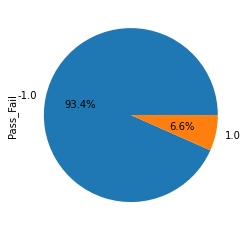

In [30]:
#Frequency distributions of the CLASS
print(truncate_df['Pass_Fail'].value_counts())
fig, ax = plt.subplots()
fig = plt.gcf()
truncate_df['Pass_Fail'].value_counts().plot(ax=ax, kind='pie',autopct='%1.1f%%')

- Class -1 is over represented compared to class 1

<AxesSubplot:xlabel='Pass_Fail', ylabel='count'>

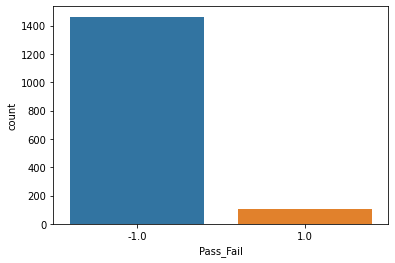

In [144]:
#Count plot on target
sns.countplot(truncate_df['Pass_Fail'])

- Target is highly imbalanced, so we will correct in next section

<AxesSubplot:>

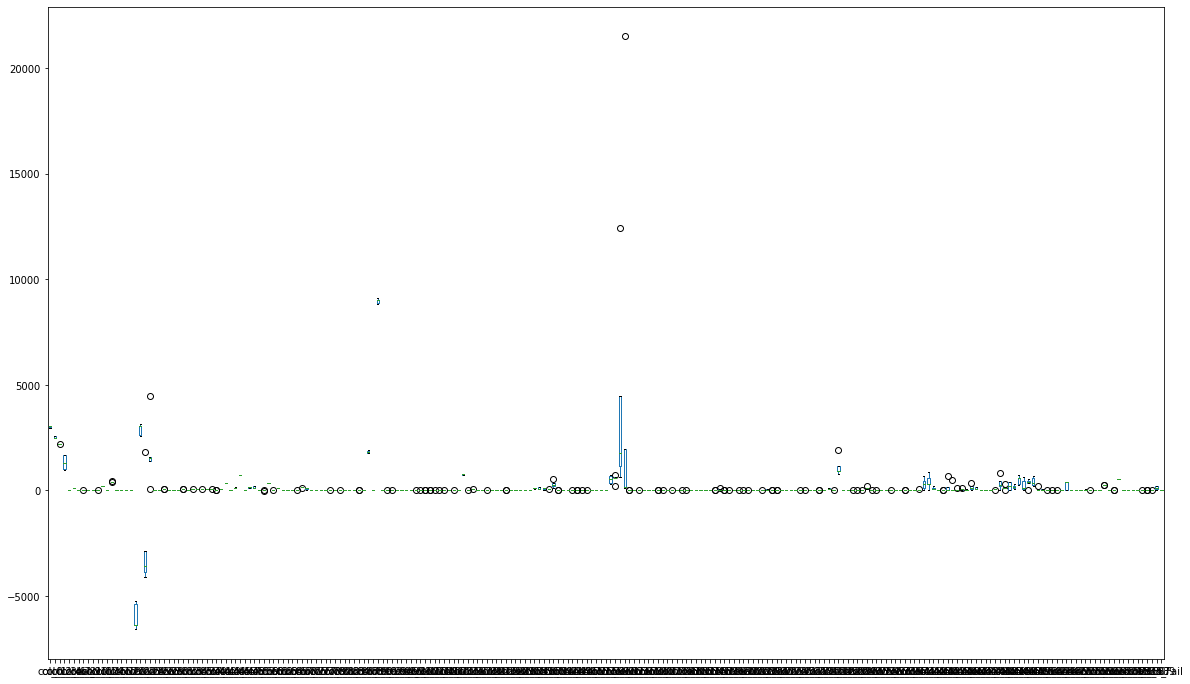

In [115]:
#Perform another kind of corrections/treatment on the data.
truncate_df.plot(kind='box' , figsize = (20,12) )

- We have good number of outliers on whole dataste
- Lets randomly choose few columns & plot

**To make visualization easier, lets randomly **select 25(10% of total) columns** & use various plots to understand the data.

<AxesSubplot:>

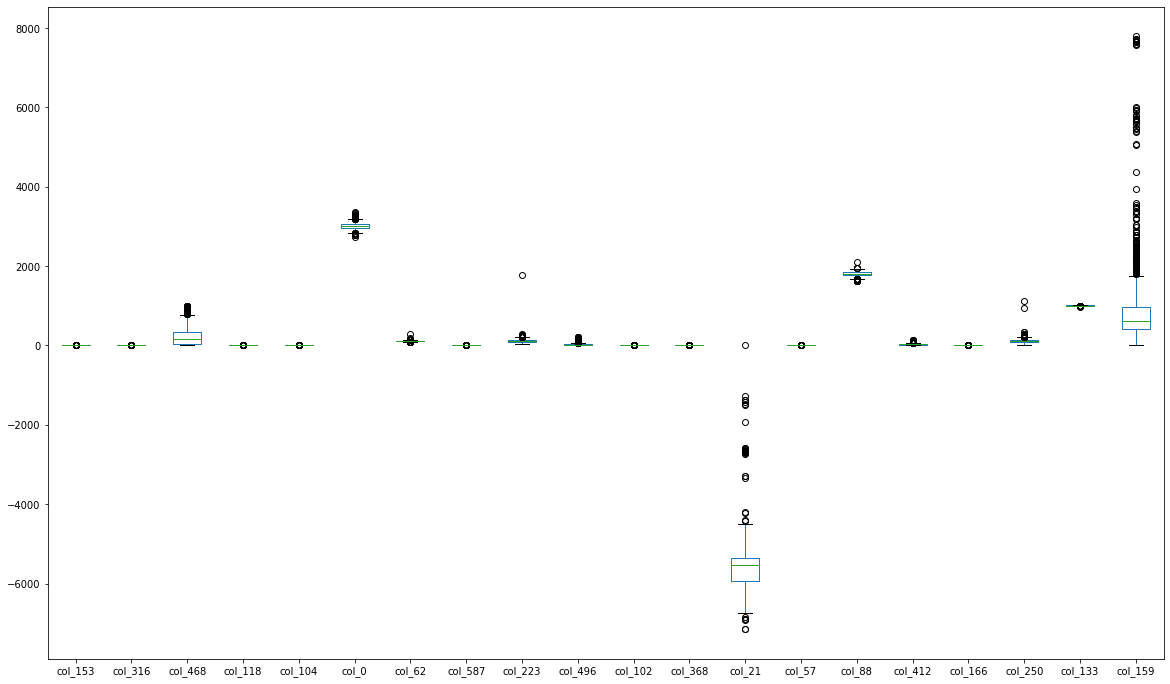

In [31]:
#Randomly selecting 20 columns
randome_df = truncate_df.sample(20,axis=1)
randome_df.plot(kind='box' , figsize = (20,12) )

- Clearly lot of outliers present in the data. It will be treated in next section
- Col21 seems to have completely negative values with outliers

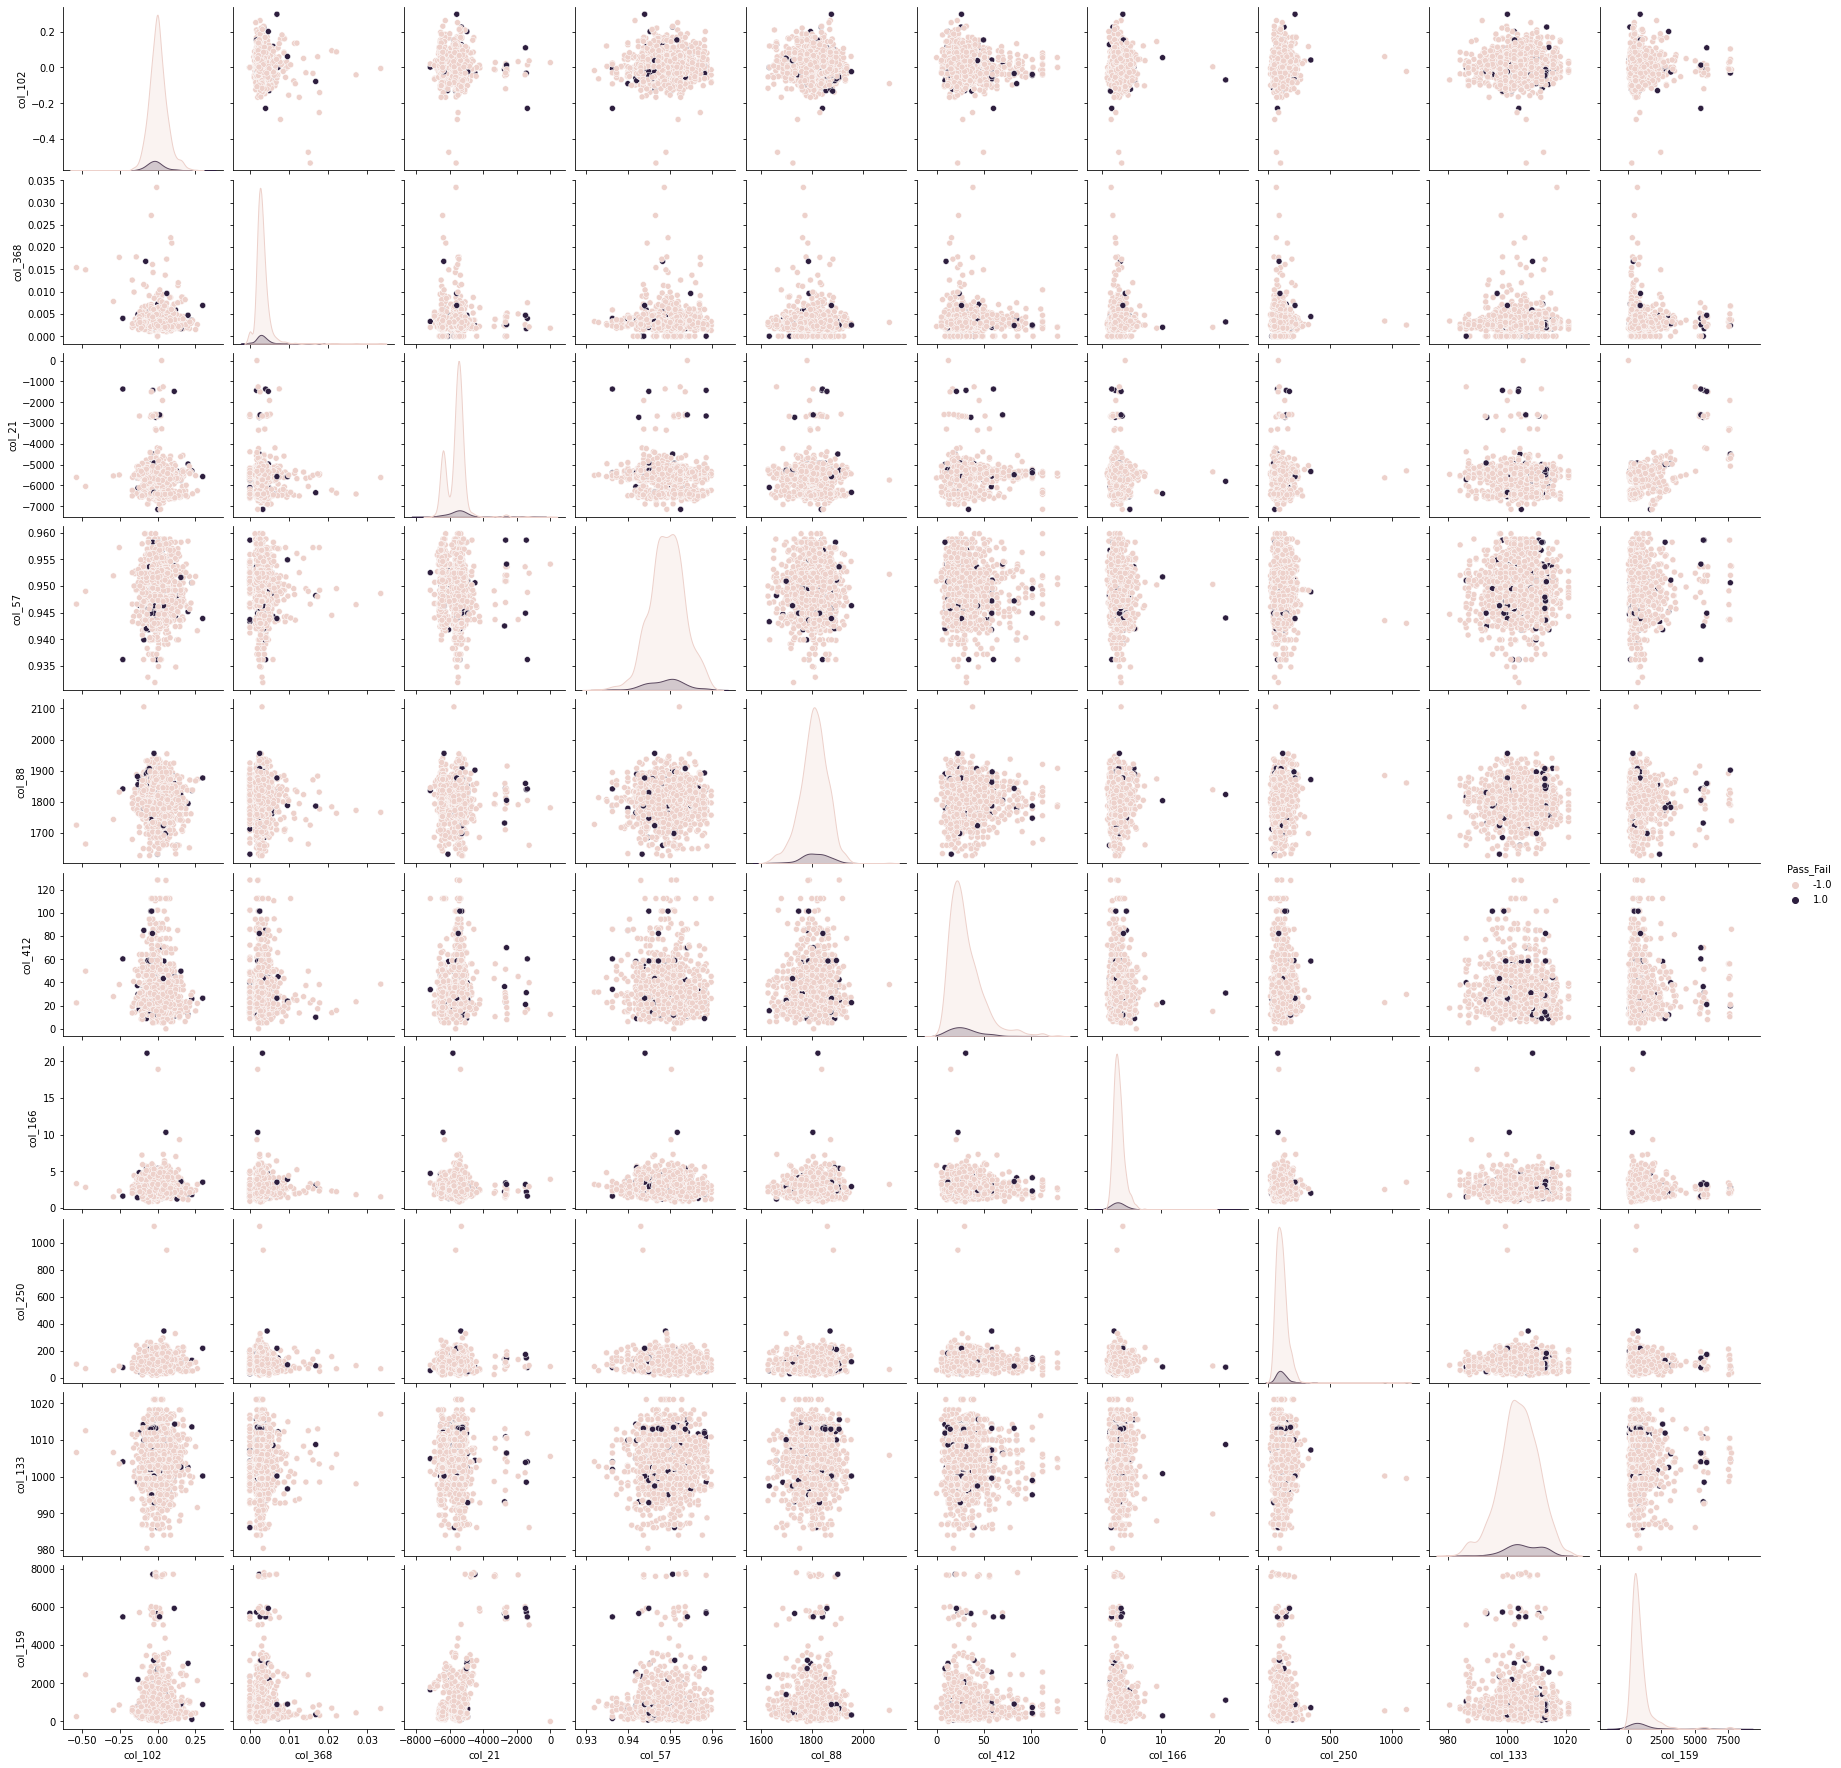

In [32]:
randome_df['Pass_Fail'] = truncate_df['Pass_Fail']
sns.pairplot(randome_df.iloc[:,10:], hue= 'Pass_Fail')
plt.show()

- From daiag, all columns with lowest values seems to be class 1 (Fail) & higher values are being passed (class -1)
- relationship isn't having any specific patterns
- Outliers are clearly present in almost each column
- Most of columns seems to have 0 values which are far away from the remaning data points.
- From daiag, seems there exists 2 clusters(optimal)


<AxesSubplot:>

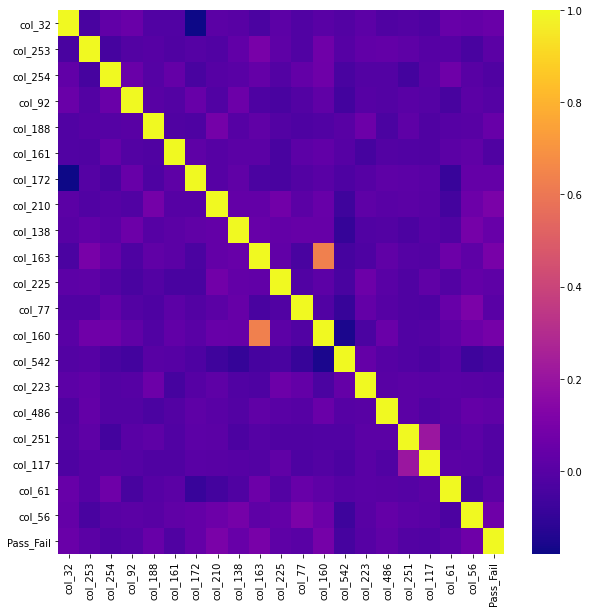

In [55]:
#Plotting heatmap
fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(randome_df.corr(),ax=ax,cmap="plasma")

- We almost eliminated highly correlated columns 
- Existing columns have less correlation almost blue colored
- No higher negative correlation present
- We can assume the same for whole dataset

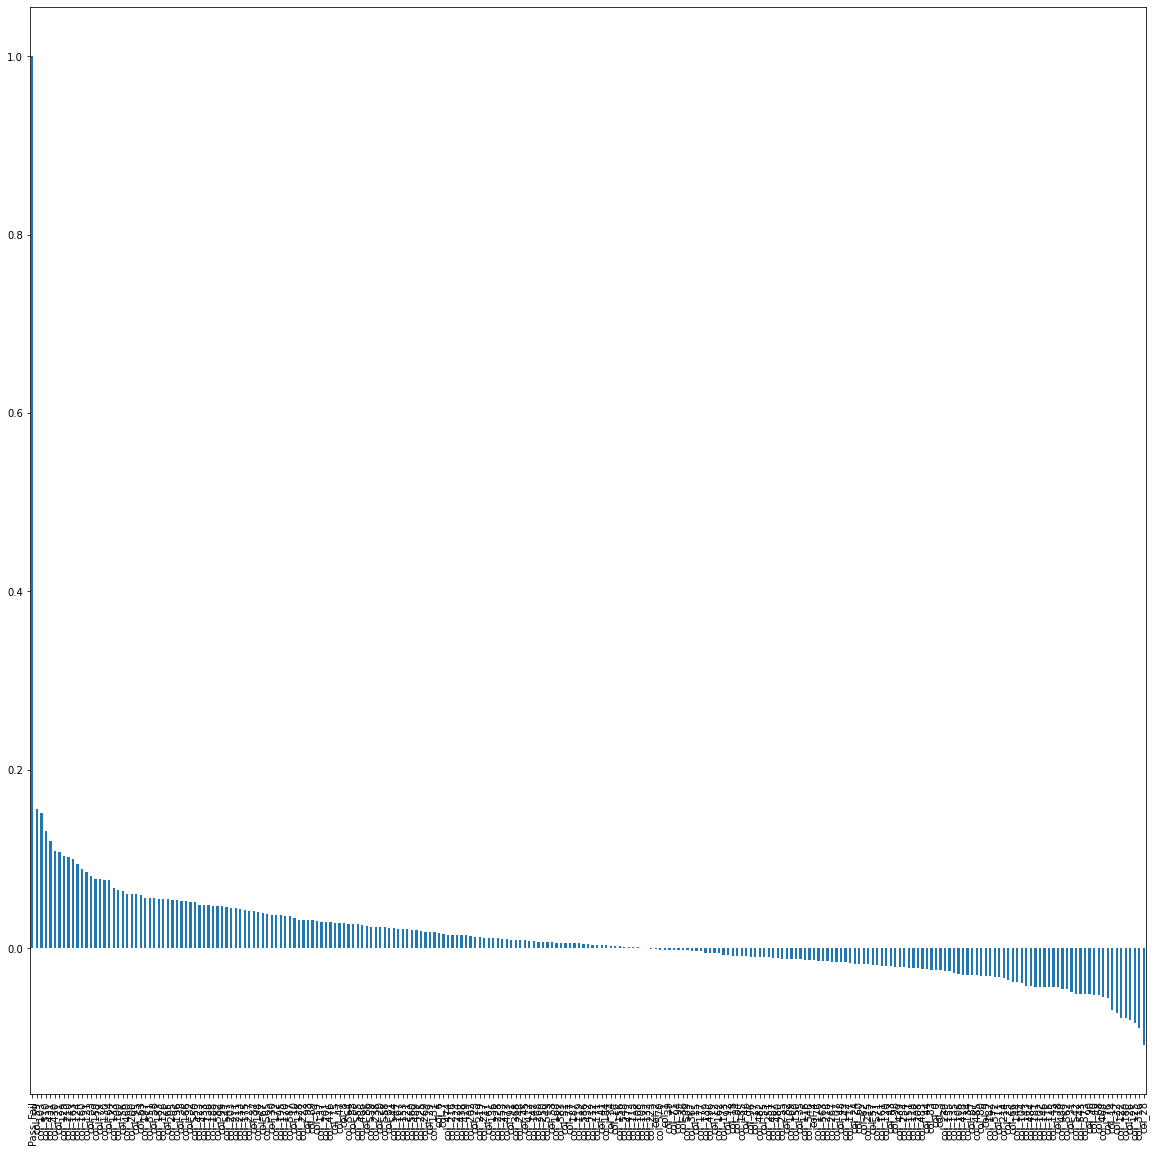

In [56]:
#Correlation between Target vs other variables
plt.figure(figsize=(20,20))
truncate_df.corr()['Pass_Fail'].sort_values(ascending = False).plot(kind='bar');

- We see correlation is very less between target & feature variables
- There are postive & negative correlations w.r.t target variable

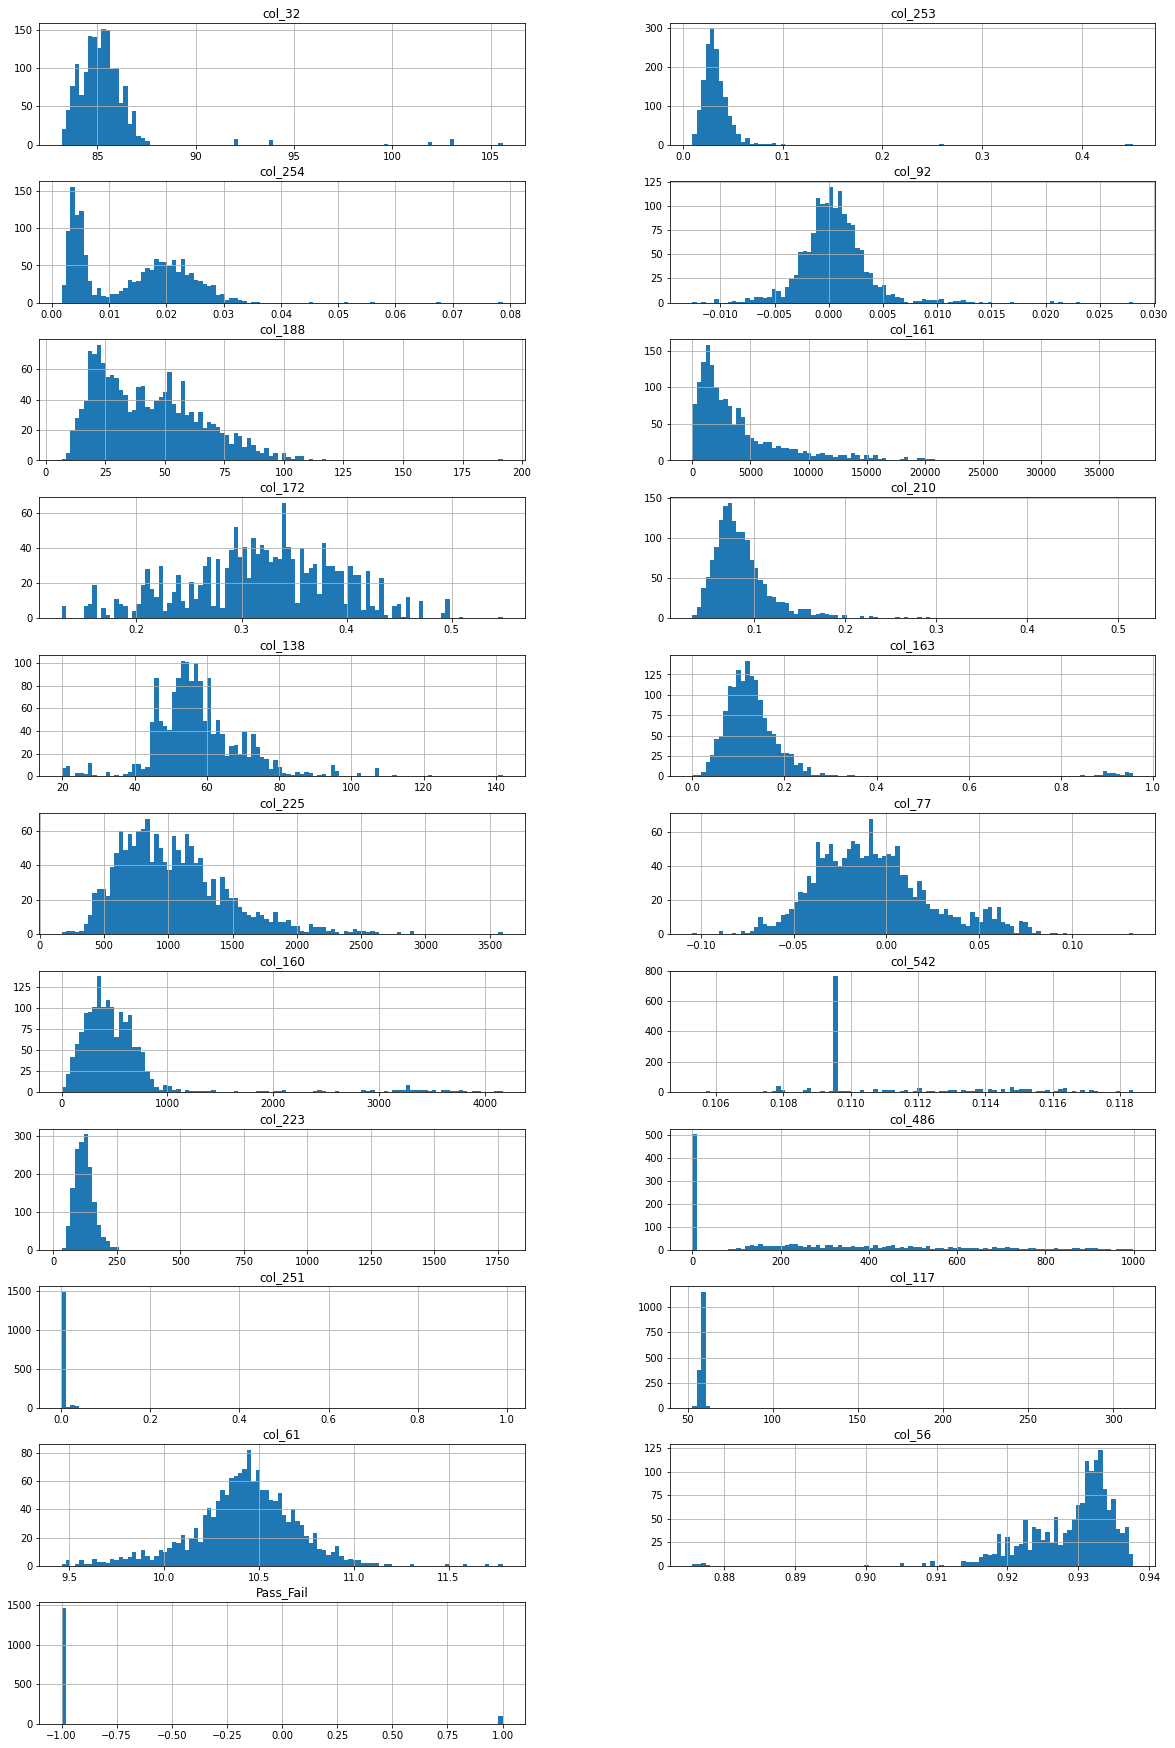

In [57]:
#Distribution plots of various columns
columns = list(randome_df)
randome_df[columns].hist(stacked=False, bins=100, figsize=(20,40), layout=(14,2)); 

- Few columns seems to have Normal distribution(61,163,253)
- Few have skewness (Right-225, Left-56)
- We see few columns affected with 0's (col 252,486)
- We see improper patterns too.


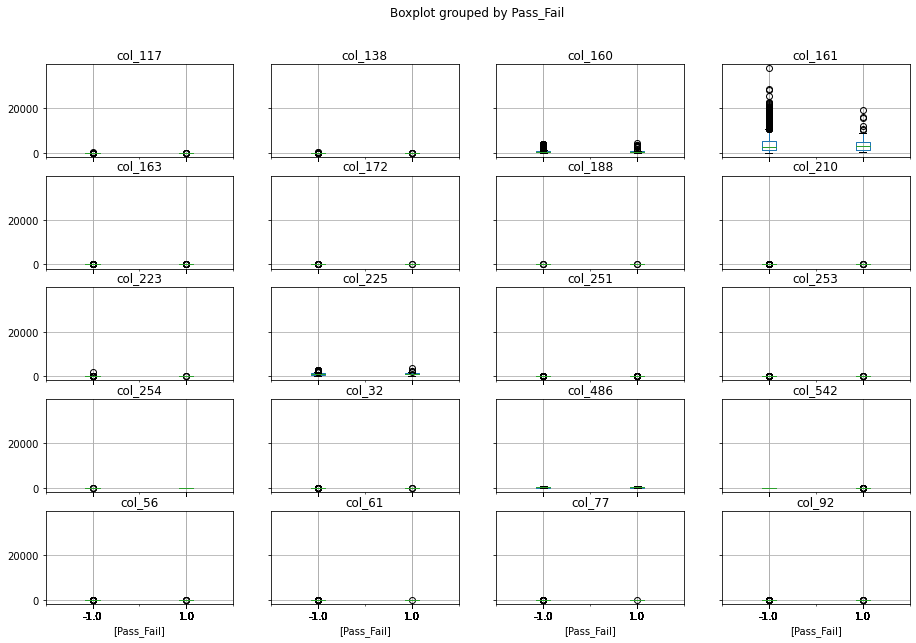

In [58]:
#Boxplot by Target variable
randome_df.boxplot(by = 'Pass_Fail', figsize=(15, 10))
plt.show()

- Way too many outliers
- Lets replace them using upper & lower limit quartiles

###### Outliers treatment & replacing with median values

In [27]:
def treat_outlier(dFrame, col_name):
    median = dFrame[col_name].median()
    q1 = dFrame[col_name].quantile(0.25)
    q3 = dFrame[col_name].quantile(0.75)
    IQR = q3-q1 #Interquartile range
    lowVal  = q1 - 1.5*IQR
    highVal = q3 + 1.5*IQR
    dFrame.loc[(dFrame[col_name] < lowVal),col_name] = median
    dFrame.loc[(dFrame[col_name] > highVal),col_name] = median
    return dFrame
#Calling the function
for col in truncate_df.columns:
    if(col != 'Pass_Fail'):
        truncate_df[col] = treat_outlier(truncate_df, col)
        
print("Shape:",truncate_df.shape)

Shape: (1567, 247)


<AxesSubplot:>

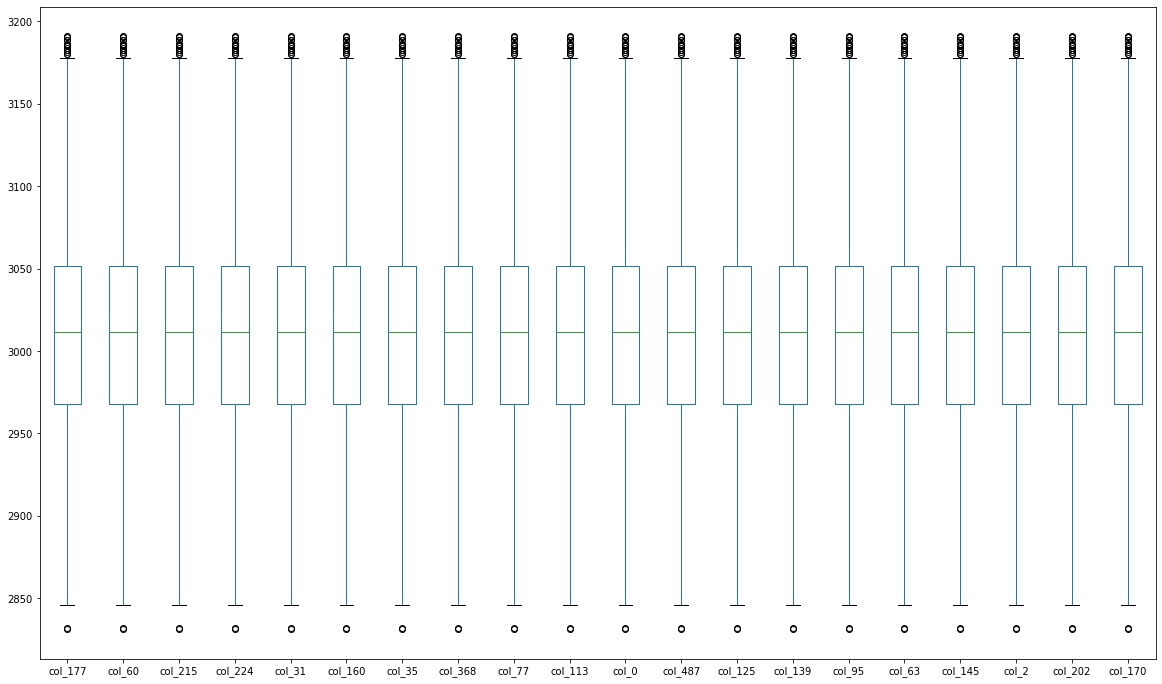

In [34]:
#Randomly selecting 20 columns
randome_df = truncate_df.sample(20,axis=1)
randome_df.plot(kind='box' , figsize = (20,12) )

- There seems to be new outliers very near to whiskers
- That is because we replaced outliers instead of removing so, new outliers get created.

## `4. Data pre-processing:`

- Segregate predictors vs target attributes
- Check for target balancing and fix it if found imbalanced.
- Perform train-test split and standardise the data or vice versa if required.
- Check if the train and test data have similar statistical characteristics when compared with original data.

In [28]:
#Copying the truncate df in order to preserve the changes sofar safer side
Part4_df = truncate_df.copy()

In [30]:
#Predictors
X = Part4_df.drop('Pass_Fail',axis=1)
#Target
y = Part4_df['Pass_Fail']

In [31]:
#target variable
y.value_counts()

-1.0    1463
 1.0     104
Name: Pass_Fail, dtype: int64

**Upscaling**

In [32]:
#Upsampling using SMOTE
sm = SMOTE(random_state = 7)
Xs,Ys = sm.fit_resample(X,y)
print("After upsampling using Synthetic Data genaration:")
print(Ys.value_counts())

After upsampling using Synthetic Data genaration:
 1.0    1463
-1.0    1463
Name: Pass_Fail, dtype: int64


In [33]:
#Predictors shape before & after upsampling
X.shape, Xs.shape

((1567, 246), (2926, 246))

In [34]:
#spliting 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(Xs, Ys, test_size=0.3, random_state=7)
X_train.shape, X_test.shape

((2048, 246), (878, 246))

In [35]:
X_train_scaled = StandardScaler().fit_transform(X_train)   # Scale train data
X_test_scaled = StandardScaler().fit_transform(X_test)     # Scale test data

In [51]:
Train = pd.DataFrame(X_train_scaled)
Train.describe()

0             1             2             3             4    \
count  2.048000e+03  2.048000e+03  2.048000e+03  2.048000e+03  2.048000e+03   
mean   1.590741e-15  1.590741e-15  1.590741e-15  1.590741e-15  1.590741e-15   
std    1.000244e+00  1.000244e+00  1.000244e+00  1.000244e+00  1.000244e+00   
min   -2.666096e+00 -2.666096e+00 -2.666096e+00 -2.666096e+00 -2.666096e+00   
25%   -6.905717e-01 -6.905717e-01 -6.905717e-01 -6.905717e-01 -6.905717e-01   
50%   -2.680973e-02 -2.680973e-02 -2.680973e-02 -2.680973e-02 -2.680973e-02   
75%    6.333263e-01  6.333263e-01  6.333263e-01  6.333263e-01  6.333263e-01   
max    2.869092e+00  2.869092e+00  2.869092e+00  2.869092e+00  2.869092e+00   

                5             6             7             8             9    \
count  2.048000e+03  2.048000e+03  2.048000e+03  2.048000e+03  2.048000e+03   
mean   1.590741e-15  1.590741e-15  1.590741e-15  1.590741e-15  1.590741e-15   
std    1.000244e+00  1.000244e+00  1.000244e+00  1.000244e+00  1.000244e+00   
min   -2.666096e+00 -2.666096e+00 -2.666096e+00 -2.666096e+00 -2.666096e+00   
25%   -6.905717e-01 -6.905717e-01 -6.905717e-01 -6.905717e-01 -6.905717e-01   
50%   -2.680973e-02 -2.680973e-02 -2.680973e-02 -2.680973e-02 -2.680973e-02   
75%    6.333263e-01  6.333263e-01  6.333263e-01  6.333263e-01  6.333263e-01   
max    2.869092e+00  2.869092e+00  2.869092e+00  2.869092e+00  2.869092e+00   

                10            11            12            13            14   \
count  2.048000e+03  2.048000e+03  2.048000e+03  2.048000e+03  2.048000e+03   
mean   1.590741e-15  1.590741e-15  1.590741e-15  1.590741e-15  1.590741e-15   
std    1.000244e+00  1.000244e+00  1.000244e+00  1.000244e+00  1.000244e+00   
min   -2.666096e+00 -2.666096e+00 -2.666096e+00 -2.666096e+00 -2.666096e+00   
25%   -6.905717e-01 -6.905717e-01 -6.905717e-01 -6.905717e-01 -6.905717e-01   
50%   -2.680973e-02 -2.680973e-02 -2.680973e-02 -2.680973e-02 -2.680973e-02   
75%    6.333263e-01  6.333263e-01  6.333263e-01  6.333263e-01  6.333263e-01   
max    2.869092e+00  2.869092e+00  2.869092e+00  2.869092e+00  2.869092e+00   

                15            16            17            18            19   \
count  2.048000e+03  2.048000e+03  2.048000e+03  2.048000e+03  2.048000e+03   
mean   1.590741e-15  1.590741e-15  1.590741e-15  1.590741e-15  1.590741e-15   
std    1.000244e+00  1.000244e+00  1.000244e+00  1.000244e+00  1.000244e+00   
min   -2.666096e+00 -2.666096e+00 -2.666096e+00 -2.666096e+00 -2.666096e+00   
25%   -6.905717e-01 -6.905717e-01 -6.905717e-01 -6.905717e-01 -6.905717e-01   
50%   -2.680973e-02 -2.680973e-02 -2.680973e-02 -2.680973e-02 -2.680973e-02   
75%    6.333263e-01  6.333263e-01  6.333263e-01  6.333263e-01  6.333263e-01   
max    2.869092e+00  2.869092e+00  2.869092e+00  2.869092e+00  2.869092e+00   

                20            21            22            23            24   \
count  2.048000e+03  2.048000e+03  2.048000e+03  2.048000e+03  2.048000e+03   
mean   1.590741e-15  1.590741e-15  1.590741e-15  1.590741e-15  1.590741e-15   
std    1.000244e+00  1.000244e+00  1.000244e+00  1.000244e+00  1.000244e+00   
min   -2.666096e+00 -2.666096e+00 -2.666096e+00 -2.666096e+00 -2.666096e+00   
25%   -6.905717e-01 -6.905717e-01 -6.905717e-01 -6.905717e-01 -6.905717e-01   
50%   -2.680973e-02 -2.680973e-02 -2.680973e-02 -2.680973e-02 -2.680973e-02   
75%    6.333263e-01  6.333263e-01  6.333263e-01  6.333263e-01  6.333263e-01   
max    2.869092e+00  2.869092e+00  2.869092e+00  2.869092e+00  2.869092e+00   

                25            26            27            28            29   \
count  2.048000e+03  2.048000e+03  2.048000e+03  2.048000e+03  2.048000e+03   
mean   1.590741e-15  1.590741e-15  1.590741e-15  1.590741e-15  1.590741e-15   
std    1.000244e+00  1.000244e+00  1.000244e+00  1.000244e+00  1.000244e+00   
min   -2.666096e+00 -2.666096e+00 -2.666096e+00 -2.666096e+00 -2.666096e+00   
25%   -6.905717e-01 -6.905717e-01 -6.905717e-01 -6.905717e-01

- Train/Test data has similar statastical values as original dataset.
- Lets visualize both original & Test/Train datasets

**Original dataset**

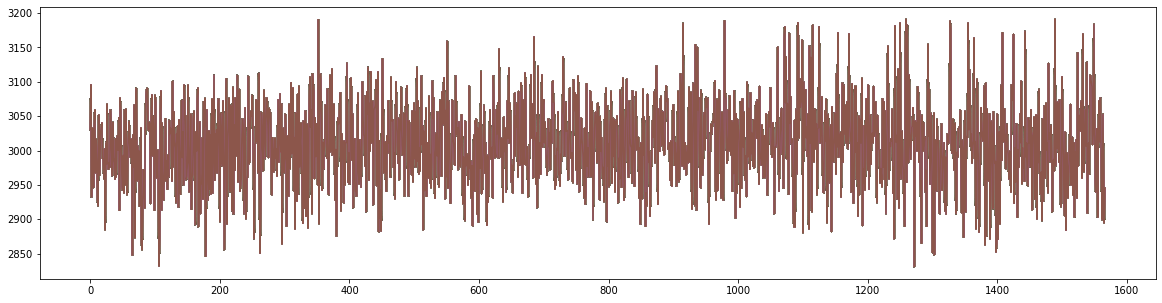

In [115]:
#Original dataset before scaled & upsampled
plt.subplots(figsize=(20,5))
plt.plot(X)
plt.show()

**Upscaled Dataset**

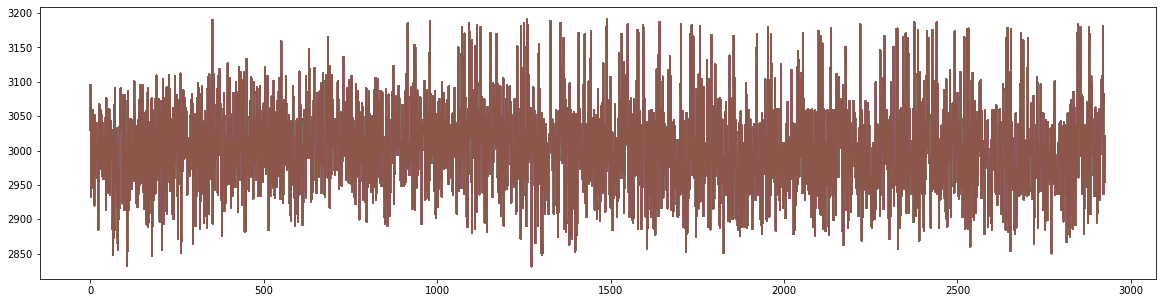

In [112]:
#Original dataset before scaled & after upsampled
plt.subplots(figsize=(20,5))
plt.plot(Xs)
plt.show()

**Training dataset**

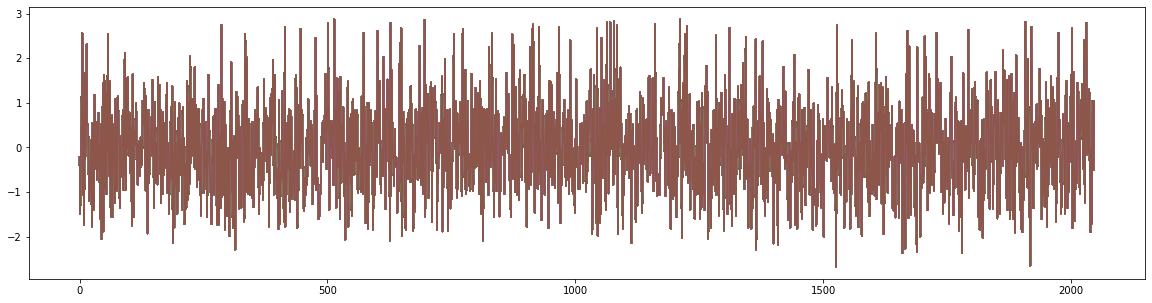

In [113]:
#Train dataset
plt.subplots(figsize=(20,5))
plt.plot(X_train_scaled)
plt.show()

**Test Dataset**

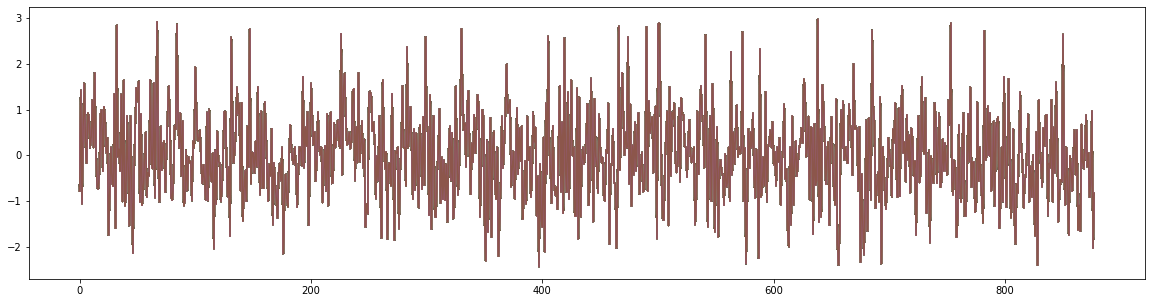

In [114]:
#Test dataset
plt.subplots(figsize=(20,5))
plt.plot(X_test_scaled)
plt.show()

## `5. Model training, testing and tuning:`

1. Model training:
    - Pick up a supervised learning model.
    - Train the model.
    - Use cross validation techniques.
        Hint: Use all CV techniques that you have learnt in the course.
    - Apply hyper-parameter tuning techniques to get the best accuracy.
        Suggestion: Use all possible hyper parameter combinations to extract the best accuracies.
    - Use any other technique/method which can enhance the model performance.
        Hint: Dimensionality reduction, attribute removal, standardisation/normalisation, target balancing etc.
    - Display and explain the classification report in detail.
    - Design a method of your own to check if the achieved train and test accuracies might change if a different sample   population can lead to new train and test accuracies.
        Hint: You can use your concepts learnt under Applied Statistics module.
    - Apply the above steps for all possible models that you have learnt so far.
2. Display and compare all the models designed with their train and test accuracies.
3. Select the final best trained model along with your detailed comments for selecting this model.
4. Pickle the selected model for future use.
5. Import the future data file. Use the same to perform the prediction using the best chosen model from above. Display the prediction results.

## `LogisticRegression`

In [36]:
#LR model
LR = LogisticRegression()
LR.fit(X_train_scaled, y_train)

LogisticRegression()

In [115]:
#Score
LR_score_train = LR.score(X_train_scaled, y_train)
LR_score_test = LR.score(X_test_scaled, y_test)
print("Train Score:",(LR_score_train*100).round(decimals=4),"%")
print("Test Score:",(LR_score_test*100).round(decimals=4),"%")

Train Score: 57.3242 %
Test Score: 54.2141 %


<AxesSubplot:>

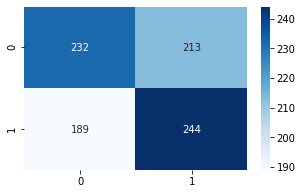

In [124]:
#predict on test & confusion matrix
y_predict = LR.predict(X_test_scaled)
conf_mat = confusion_matrix(y_test, y_predict)
df_conf_mat = pd.DataFrame(conf_mat)
plt.figure(figsize = (5,3))
sns.heatmap(df_conf_mat, annot=True,cmap='Blues', fmt='g')

In [125]:
#Classification Report:
clf_report = classification_report(y_test,y_predict)
print(clf_report)

              precision    recall  f1-score   support

        -1.0       0.55      0.52      0.54       445
         1.0       0.53      0.56      0.55       433

    accuracy                           0.54       878
   macro avg       0.54      0.54      0.54       878
weighted avg       0.54      0.54      0.54       878



**KFold 10 with Cross-Validation Avg results**

In [46]:
X_scaled = StandardScaler().fit_transform(Xs)
cv = KFold(n_splits=10, random_state=7, shuffle=True)
# create model
LRmodel = LogisticRegression()
# evaluate model
scores = cross_val_score(LRmodel, X_scaled, Ys, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.566 (0.019)


- Avg score is 56% with +/- 1.9%
- Avg score without cv is 54%
- Our Model is underfitting
- Lets use hypertuning & will do the above again.

**Hyper Tuning the Logistic Regression**

In [118]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
             'penalty' : ['l1', 'l2'],
              'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
clf = GridSearchCV(LogisticRegression(), param_grid,verbose=True)


In [119]:
clf.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 70 candidates, totalling 350 fits


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=True)

In [120]:
clf.best_params_

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

In [123]:
LRmodel = LogisticRegression(C=0.1,penalty= 'l1', solver='liblinear')
# evaluate model
scores = cross_val_score(LRmodel, X_scaled, Ys, scoring='accuracy', cv=7, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.564 (0.022)


- No improvement even after hyper-tuning the LR model

**PCA with 95% variance**


**Pipeline Method**

In [124]:
pipe_lr = Pipeline([('scl', StandardScaler()), ('pca', PCA(n_components = 0.95)), ('clf', LogisticRegression(C=0.1,penalty= 'l1', solver='liblinear',random_state=7))]) 
pipe_lr.fit(X_train_scaled, y_train) 
print('Test Accuracy: %.3f' % pipe_lr.score(X_test_scaled, y_test))

Test Accuracy: 0.541


## `Logistic RegressionCV`

In [128]:
clf = LogisticRegressionCV(cv=10, random_state=7).fit(X_train_scaled, y_train)
clf.score(X_test_scaled, y_test)

0.5432801822323462

- Score is slightly improved with LogisticCV model.

<AxesSubplot:>

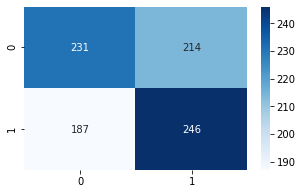

In [129]:
#predict on test
y_predict = clf.predict(X_test_scaled)
conf_mat = confusion_matrix(y_test, y_predict)
df_conf_mat = pd.DataFrame(conf_mat)
plt.figure(figsize = (5,3))
sns.heatmap(df_conf_mat, annot=True,cmap='Blues', fmt='g')

In [130]:
#Classification Report:
clf_report = classification_report(y_test,y_predict)
print(clf_report)

              precision    recall  f1-score   support

        -1.0       0.55      0.52      0.54       445
         1.0       0.53      0.57      0.55       433

    accuracy                           0.54       878
   macro avg       0.54      0.54      0.54       878
weighted avg       0.54      0.54      0.54       878



**Comparing the classification reports**

- The score is slightly better after hyper tuning.
- Prediction rate is same for both models.
- True postive rate (Recall) is slightly(1%) better after hyper-tuning.
- Precision & F1-score is just same.

#### Trying Different sample populations - Logistic Model

In [38]:
temp=Xs.copy()
temp['Pass_Fail']=Ys.copy()
values=temp.values

# configure bootstrap
n_iterations = 100              # Number of bootstrap samples to create
n_size = int(len(Xs) * 0.50)    # picking only 50 % of the given data in every bootstrap sample

scores=[]
# run bootstrap
stats = list()
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    #fit model
    model = LogisticRegression(C=0.1,penalty= 'l1', solver='liblinear',random_state=7)
    model.fit(train[:,:-1], train[:,-1])
    # evaluate model
    predictions = model.predict(test[:,:-1])
    score = accuracy_score(test[:,-1], predictions)    # caution, overall accuracy score can mislead when classes are imbalanced
    #print(score)
    stats.append(score)

In [46]:
#Avg score
print('Avg Accuracy: %.3f Std: (%.3f)' % (np.mean(stats), np.std(stats)))

Avg Accuracy: 0.496 Std: (0.006)


- Avg Acuuracy is slightly different from the score on whole dataset

## `SVM Model`

In [70]:
# SVM - Hyper parameters tuning
c = np.arange(0.1,1.1,0.1)  # Range of C values
kernels = ['linear','rbf','sigmoid','poly']  # Range of kernels

#Loop to find the best parameters for C and Kernels

for k in range (len(kernels)):
    for i in range (len(c)):
        SVM_Classifier = SVC(C=c[i],kernel=kernels[k])
        SVM_Classifier.fit(X_train_scaled, y_train)
        print ('C=',round(c[i],2),"\tKernel=",kernels[k],'\tScore=',SVM_Classifier.score(X_test_scaled, y_test))


C= 0.1 	Kernel= linear 	Score= 0.5546697038724373
C= 0.2 	Kernel= linear 	Score= 0.5546697038724373
C= 0.3 	Kernel= linear 	Score= 0.5546697038724373
C= 0.4 	Kernel= linear 	Score= 0.5546697038724373
C= 0.5 	Kernel= linear 	Score= 0.5546697038724373
C= 0.6 	Kernel= linear 	Score= 0.5546697038724373
C= 0.7 	Kernel= linear 	Score= 0.5546697038724373
C= 0.8 	Kernel= linear 	Score= 0.5546697038724373
C= 0.9 	Kernel= linear 	Score= 0.5546697038724373
C= 1.0 	Kernel= linear 	Score= 0.5546697038724373
C= 0.1 	Kernel= rbf 	Score= 0.5569476082004556
C= 0.2 	Kernel= rbf 	Score= 0.5592255125284739
C= 0.3 	Kernel= rbf 	Score= 0.5569476082004556
C= 0.4 	Kernel= rbf 	Score= 0.5569476082004556
C= 0.5 	Kernel= rbf 	Score= 0.5592255125284739
C= 0.6 	Kernel= rbf 	Score= 0.5626423690205011
C= 0.7 	Kernel= rbf 	Score= 0.5649202733485194
C= 0.8 	Kernel= rbf 	Score= 0.5637813211845103
C= 0.9 	Kernel= rbf 	Score= 0.5626423690205011
C= 1.0 	Kernel= rbf 	Score= 0.5637813211845103
C= 0.1 	Kernel= sigmoid 	Score

In [71]:
# SVM - Model
SVM = SVC(C=1.0,kernel='rbf')
SVM.fit(X_train_scaled, y_train)

SVM_Accuracy=SVM.score(X_train_scaled, y_train)
print("Train Accuracy : ", SVM_Accuracy)

SVM_Accuracy=SVM.score(X_test_scaled, y_test)
print("Test Accuracy : ", SVM_Accuracy)

Train Accuracy :  0.59619140625
Test Accuracy :  0.5637813211845103


<AxesSubplot:>

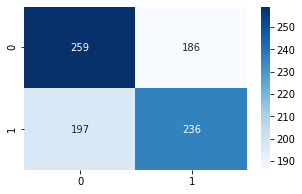

In [78]:
#SVM model confusion matrix
#predict on test
y_predict = SVM.predict(X_test_scaled)
conf_mat = confusion_matrix(y_test, y_predict)
df_conf_mat = pd.DataFrame(conf_mat)
plt.figure(figsize = (5,3))
sns.heatmap(df_conf_mat, annot=True,cmap='Blues', fmt='g')

In [79]:
#Classification Report:
clf_report = classification_report(y_test,y_predict)
print(clf_report)

              precision    recall  f1-score   support

        -1.0       0.57      0.58      0.57       445
         1.0       0.56      0.55      0.55       433

    accuracy                           0.56       878
   macro avg       0.56      0.56      0.56       878
weighted avg       0.56      0.56      0.56       878



- Train Accuracy is better & Model is failed to predict on Test data well.
- As we see class -1 is predicted better than class 1


**Pipleline - Scaling,PCA=0.95,SVC Model**

In [252]:
#pipeline
pipe_lr = Pipeline([('scl', StandardScaler()), ('pca', PCA(n_components = 0.95)), 
                    ('clf', SVC(C=1.0,kernel='rbf'))]) 
pipe_lr.fit(X_train_scaled, y_train) 
#Score
print('Test Accuracy: %.3f' % pipe_lr.score(X_test_scaled, y_test))

Test Accuracy: 0.564


**Different sample population - SVC**

In [249]:
#copying whole df
temp=Xs.copy()
temp['Pass_Fail']=Ys.copy()
values=temp.values

# configure bootstrap
n_iterations = 25              # Number of bootstrap samples to create
n_size = int(len(Xs) * 0.50)    # picking only 50 % of the given data in every bootstrap sample

scores=[]
# run bootstrap
stats = list()
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    #fit model
    model= SVC(C=1.0,kernel='rbf')
    model.fit(train[:,:-1], train[:,-1])
    # evaluate model
    predictions = model.predict(test[:,:-1])
    score = accuracy_score(test[:,-1], predictions)    # caution, overall accuracy score can mislead when classes are imbalanced
    #print(score)
    stats.append(score)

#Avg score
print('Avg Accuracy: %.3f Std: (%.3f)' % (np.mean(stats), np.std(stats)))

Avg Accuracy: 0.577 Std: (0.013)


- Avg score isn't changing much with different samples

## `KNN Model`

In [72]:
#choosing the K value
# creating odd list of K for KNN
myList = list(range(2,20))  # k=arange(1,20,2)

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    # predict the response
    y_pred = knn.predict(X_test_scaled)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 19


In [73]:
# KNN - Model
KNN = KNeighborsClassifier(n_neighbors=19)
KNN.fit(X_train_scaled, y_train)

y_pred = KNN.predict(X_train_scaled)
KNN_Accuracy_Train=accuracy_score(y_train, y_pred)
print("Train Accuracy : ", KNN_Accuracy_Train)

y_pred = KNN.predict(X_test_scaled)
KNN_Accuracy_Test=accuracy_score(y_test, y_pred)
print("Test Accuracy : ", KNN_Accuracy_Test)

Train Accuracy :  0.71435546875
Test Accuracy :  0.5580865603644647


<AxesSubplot:>

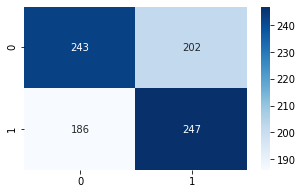

In [80]:
#KNN model confusion matrix
#predict on test
y_predictKNN = KNN.predict(X_test_scaled)
conf_mat = confusion_matrix(y_test, y_predictKNN)
df_conf_mat = pd.DataFrame(conf_mat)
plt.figure(figsize = (5,3))
sns.heatmap(df_conf_mat, annot=True,cmap='Blues', fmt='g')

In [81]:
#Classification Report:
clf_report = classification_report(y_test,y_predictKNN)
print(clf_report)

              precision    recall  f1-score   support

        -1.0       0.57      0.55      0.56       445
         1.0       0.55      0.57      0.56       433

    accuracy                           0.56       878
   macro avg       0.56      0.56      0.56       878
weighted avg       0.56      0.56      0.56       878



- Precision is better for class -1 & recall is better for class 1 And F1 score is same
- Model predicted well on training data, better than any previous alogorithams

**KNN - Hyper parameters tuning**

In [97]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
KNN_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(KNN_2, hyperparameters, cv=10)
#Fit the model
X_scaled = StandardScaler().fit_transform(Xs)
best_model = clf.fit(X_scaled,Ys)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 2
Best n_neighbors: 26


In [98]:
# KNN - Model
KNN2 = KNeighborsClassifier(n_neighbors=26,leaf_size=1,p=2)
KNN2.fit(X_train_scaled, y_train)

y_pred = KNN2.predict(X_train_scaled)
KNN_Accuracy_Train=accuracy_score(y_train, y_pred)
print("Train Accuracy : ", KNN_Accuracy_Train)

y_pred = KNN2.predict(X_test_scaled)
KNN_Accuracy_Test=accuracy_score(y_test, y_pred)
print("Test Accuracy : ", KNN_Accuracy_Test)

Train Accuracy :  0.6923828125
Test Accuracy :  0.5603644646924829


- Over all accuracy isn't improved much even after parameter tuning.


**Pipleline - Scaling,PCA=0.95,KNN Model**

In [253]:
#Pipeline
pipe_lr = Pipeline([('scl', StandardScaler()), ('pca', PCA(n_components = 0.95)), 
                    ('clf', KNeighborsClassifier(n_neighbors=26,leaf_size=1,p=2))]) 
pipe_lr.fit(X_train_scaled, y_train)
#Score
print('Test Accuracy: %.3f' % pipe_lr.score(X_test_scaled, y_test))

Test Accuracy: 0.558


**Different Sample Population - KNN**

In [248]:
temp=Xs.copy()
temp['Pass_Fail']=Ys.copy()
values=temp.values

# configure bootstrap
n_iterations = 25              # Number of bootstrap samples to create
n_size = int(len(Xs) * 0.50)    # picking only 50 % of the given data in every bootstrap sample

scores=[]
# run bootstrap
stats = list()
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    #fit model
    model=KNeighborsClassifier(n_neighbors=26,leaf_size=1,p=2)
    model.fit(train[:,:-1], train[:,-1])
    # evaluate model
    predictions = model.predict(test[:,:-1])
    score = accuracy_score(test[:,-1], predictions)    # caution, overall accuracy score can mislead when classes are imbalanced
    #print(score)
    stats.append(score)

#Avg score
print('Avg Accuracy: %.3f Std: (%.3f)' % (np.mean(stats), np.std(stats)))

Avg Accuracy: 0.654 Std: (0.009)


- Avg score with different samples is almost near & not much change 

## `Decision Tree`

In [94]:
# Decision Tree
# Model
model_DT=DecisionTreeClassifier(criterion='entropy',
                                splitter='best',
                                max_depth=5,
                                min_samples_split=2,  
                                min_samples_leaf=1,
                                min_weight_fraction_leaf=0.0,
                                max_features=None,
                                random_state=None,
                                max_leaf_nodes=None,
                                min_impurity_decrease=0.0,
                                min_impurity_split=None,
                                class_weight=None,
                                ccp_alpha=0.0)

model_DT.fit(X_train_scaled, y_train)

# Accuracy
DT_Train=model_DT.score(X_train_scaled, y_train)
DT_Test=model_DT.score(X_test_scaled, y_test)

# Output
print("Train Accuracy:",DT_Train)
print("Test Accuracy:",DT_Test)

Train Accuracy: 0.6435546875
Test Accuracy: 0.5227790432801822


<AxesSubplot:>

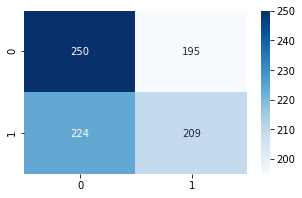

In [95]:
#model classification report
#predict on test
y_predictDT = model_DT.predict(X_test_scaled)
conf_mat = confusion_matrix(y_test, y_predictDT)
df_conf_mat = pd.DataFrame(conf_mat)
plt.figure(figsize = (5,3))
sns.heatmap(df_conf_mat, annot=True,cmap='Blues', fmt='g')

In [96]:
#Classification Report:
clf_report = classification_report(y_test,y_predictDT)
print(clf_report)

              precision    recall  f1-score   support

        -1.0       0.53      0.56      0.54       445
         1.0       0.52      0.48      0.50       433

    accuracy                           0.52       878
   macro avg       0.52      0.52      0.52       878
weighted avg       0.52      0.52      0.52       878



**Decision Tree - Hyperparameter Tuning**

In [99]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}
dt=DecisionTreeClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")
grid_search.fit(X_train_scaled, y_train)
grid_search.best_estimator_

Fitting 4 folds for each of 50 candidates, totalling 200 fits


DecisionTreeClassifier(max_depth=10, min_samples_leaf=10)

In [100]:
# Tuned DT Model
model_DT=DecisionTreeClassifier(criterion='entropy',                                
                                max_depth=10,                               
                                min_samples_leaf=10,                                
                                random_state=7
                                )

model_DT.fit(X_train_scaled, y_train)

# Accuracy
DT_Train=model_DT.score(X_train_scaled, y_train)
DT_Test=model_DT.score(X_test_scaled, y_test)

# Output
print("Train Accuracy:",DT_Train)
print("Test Accuracy:",DT_Test)

Train Accuracy: 0.72900390625
Test Accuracy: 0.5318906605922551


- Far better model sofar 
- Has good score with train but not as expected with train data

**Pipleline - Scaling,PCA=0.95, Decision Tree Model**

In [254]:
#Pipeline
pipe_lr = Pipeline([('scl', StandardScaler()), ('pca', PCA(n_components = 0.95)), 
                    ('clf', DecisionTreeClassifier(criterion='entropy',                                
                                max_depth=10,                               
                                min_samples_leaf=10,                                
                                random_state=7
                                ))]) 
pipe_lr.fit(X_train_scaled, y_train) 
#Score
print('Test Accuracy: %.3f' % pipe_lr.score(X_test_scaled, y_test))

Test Accuracy: 0.532


**Different Sample population - Decision Trees**

In [247]:
temp=Xs.copy()
temp['Pass_Fail']=Ys.copy()
values=temp.values

# configure bootstrap
n_iterations = 25              # Number of bootstrap samples to create
n_size = int(len(Xs) * 0.50)    # picking only 50 % of the given data in every bootstrap sample

scores=[]
# run bootstrap
stats = list()
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    #fit model
    model=DecisionTreeClassifier(criterion='entropy',                                
                                max_depth=10,                               
                                min_samples_leaf=10,                                
                                random_state=7
                                )

    model.fit(train[:,:-1], train[:,-1])
    # evaluate model
    predictions = model.predict(test[:,:-1])
    score = accuracy_score(test[:,-1], predictions)    # caution, overall accuracy score can mislead when classes are imbalanced
    #print(score)
    stats.append(score)

#Avg score
print('Avg Accuracy: %.3f Std: (%.3f)' % (np.mean(stats), np.std(stats)))

Avg Accuracy: 0.629 Std: (0.020)


- with different samples, the score is almost 10% less on avg

## `Random Forest Model`

In [74]:
# RANDOM FOREST
# Model
model_RF = RandomForestClassifier(n_estimators=100,
                                    criterion='gini',
                                    max_depth=4,
                                    min_samples_split=2,
                                    min_samples_leaf=1,
                                    min_weight_fraction_leaf=0.0,
                                    max_features='sqrt',
                                    max_leaf_nodes=None,
                                    min_impurity_decrease=0.0,
                                    min_impurity_split=None,
                                    bootstrap=True,
                                    oob_score=False,
                                    n_jobs=None,
                                    random_state=None,
                                    verbose=0,
                                    warm_start=False,
                                    class_weight=None,
                                    ccp_alpha=0.001,
                                    max_samples=None,)
model_RF.fit(X_train_scaled, y_train)

# Accuracy
pred_RF = model_RF.predict(X_test_scaled)
RF_Train = model_RF.score(X_train_scaled, y_train)
RF_Test = accuracy_score(y_test, pred_RF)

# Output
print("Train Accuracy:",RF_Train)
print("Test Accuracy:",RF_Test)

Train Accuracy: 0.6484375
Test Accuracy: 0.5637813211845103


<AxesSubplot:>

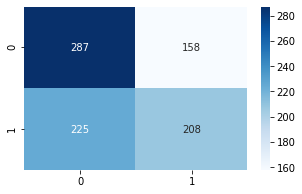

In [82]:
#classification report
#predict on test
y_predictRF = model_RF.predict(X_test_scaled)
conf_mat = confusion_matrix(y_test, y_predictRF)
df_conf_mat = pd.DataFrame(conf_mat)
plt.figure(figsize = (5,3))
sns.heatmap(df_conf_mat, annot=True,cmap='Blues', fmt='g')

In [83]:
#Classification Report:
clf_report = classification_report(y_test,y_predictRF)
print(clf_report)

              precision    recall  f1-score   support

        -1.0       0.56      0.64      0.60       445
         1.0       0.57      0.48      0.52       433

    accuracy                           0.56       878
   macro avg       0.56      0.56      0.56       878
weighted avg       0.56      0.56      0.56       878



- Training score is better than testing score
- Class -1 is predicted far better than Class 1
- F1 score is high for class -1
- Recall score is way too low for class 1

**Random Forest HyperTuning**

In [103]:
# specify parameters and distributions to sample from
param_dist = {"max_depth": [3,4,5],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}
# build a classifier
clf = RandomForestClassifier(n_estimators=50)

# run randomized search
samples = 10  # number of random samples 
randomCV = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=samples) #default cv = 3

randomCV.fit(X_scaled, Ys)

print(randomCV.best_params_)


{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 9, 'min_samples_leaf': 7, 'min_samples_split': 5}


In [263]:
# RANDOM FOREST Tuned Model

model_RF = RandomForestClassifier(n_estimators=50,
                                    criterion='entropy',
                                    max_depth=5,
                                    min_samples_split=5,
                                    min_samples_leaf=7,                                
                                    max_features=9,
                                    bootstrap=True,
                                    )

model_RF.fit(X_train_scaled, y_train)

# Accuracy
pred_RF = model_RF.predict(X_test_scaled)
RF_Train = model_RF.score(X_train_scaled, y_train)
RF_Test = accuracy_score(y_test, pred_RF)

# Output
print("Train Accuracy:",RF_Train)
print("Test Accuracy:",RF_Test)

Train Accuracy: 0.6669921875
Test Accuracy: 0.5592255125284739


- Not much better score
- Decision Tree model is much better than RF model

**Pipleline - Scaling,PCA=0.95, RandomForest Model**

In [262]:
#Pipeline
pipe_lr = Pipeline([('scl', StandardScaler()), ('pca', PCA(n_components = 0.95)), 
                    ('clf', RandomForestClassifier(n_estimators=50,
                                    criterion='entropy',
                                    max_depth=5,
                                    min_samples_split=5,
                                    min_samples_leaf=7,                                
                                    bootstrap=True,
                                    ))]) 
pipe_lr.fit(X_train_scaled, y_train)
#Score
print('Test Accuracy: %.3f' % pipe_lr.score(X_test_scaled, y_test))

Test Accuracy: 0.567


**Different Sample Polulation - Random Forest**

In [261]:
temp=Xs.copy()
temp['Pass_Fail']=Ys.copy()
values=temp.values

# configure bootstrap
n_iterations = 25              # Number of bootstrap samples to create
n_size = int(len(Xs) * 0.50)    # picking only 50 % of the given data in every bootstrap sample

scores=[]
# run bootstrap
stats = list()
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    #fit model
    model = RandomForestClassifier(n_estimators=50,
                                    criterion='entropy',
                                    max_depth=5,
                                    min_samples_split=5,
                                    min_samples_leaf=7,                                
                                    max_features=9,
                                    bootstrap=True,
                                    )

    model.fit(train[:,:-1], train[:,-1])
    # evaluate model
    predictions = model.predict(test[:,:-1])
    score = accuracy_score(test[:,-1], predictions)    # caution, overall accuracy score can mislead when classes are imbalanced
    #print(score)
    stats.append(score)

#Avg score
print('Avg Accuracy: %.3f Std: (%.3f)' % (np.mean(stats), np.std(stats)))

Avg Accuracy: 0.636 Std: (0.017)


- Avg Score is better with different samples

## `ADA Boosting`

In [75]:
# ADA Boosting
# Model
model = AdaBoostClassifier( base_estimator=None, 
                            n_estimators=200,
                            learning_rate=1.0,
                            algorithm='SAMME.R',
                            random_state=None,)
model_AB = model.fit(X_train_scaled, y_train)

# Accuracy
AB_Train = model_AB.score(X_train_scaled, y_train)
pred_AB =model_AB.predict(X_test_scaled)
acc_AB = accuracy_score(y_test, pred_AB)

print("Train Accuracy:",AB_Train)
print("Test Accuracy:",acc_AB)

Train Accuracy: 0.7158203125
Test Accuracy: 0.5341685649202733


<AxesSubplot:>

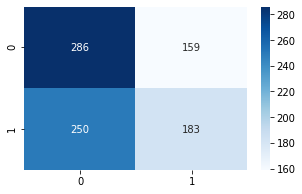

In [84]:
#classification report
#predict on test
y_predictAB = model_AB.predict(X_test_scaled)
conf_mat = confusion_matrix(y_test, y_predictAB)
df_conf_mat = pd.DataFrame(conf_mat)
plt.figure(figsize = (5,3))
sns.heatmap(df_conf_mat, annot=True,cmap='Blues', fmt='g')

In [85]:
#Classification Report:
clf_report = classification_report(y_test,y_predictAB)
print(clf_report)

              precision    recall  f1-score   support

        -1.0       0.53      0.64      0.58       445
         1.0       0.54      0.42      0.47       433

    accuracy                           0.53       878
   macro avg       0.53      0.53      0.53       878
weighted avg       0.53      0.53      0.53       878



- Train score is far better than Test score
- Class -1 is being predicted better yet again
- Recall & F1 score of Class1 is too low

**Ada Boosting Hyperparameter Tuning**

In [109]:
param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [1, 2]
             }


DTC = DecisionTreeClassifier(random_state = 7, max_features = "auto", class_weight = "balanced",max_depth = None)
ABC = AdaBoostClassifier(base_estimator = DTC)

# run grid search
grid_search_ABC = GridSearchCV(ABC, param_grid=param_grid, scoring = 'accuracy')
grid_search_ABC.fit(X_train_scaled, y_train)
grid_search_ABC.best_estimator_

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         criterion='entropy',
                                                         max_features='auto',
                                                         random_state=7,
                                                         splitter='random'),
                   n_estimators=2)

In [110]:
#Tuned AdaBoost Model
model = AdaBoostClassifier( base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         criterion='entropy',
                                                         max_features='auto',
                                                         random_state=7,
                                                         splitter='random'),    
                            n_estimators=2,
                            learning_rate=1.0,
                            random_state=7)
model_AB = model.fit(X_train_scaled, y_train)

# Accuracy
AB_Train = model_AB.score(X_train_scaled, y_train)
pred_AB =model_AB.predict(X_test_scaled)
acc_AB = accuracy_score(y_test, pred_AB)

print("Train Accuracy:",AB_Train)
print("Test Accuracy:",acc_AB)

Train Accuracy: 0.98291015625
Test Accuracy: 0.5068337129840547


- We have achived the best Train score so far 98%
- Too low test score 50% though

**Pipleline - Scaling,PCA=0.95,AdaBoosting Model**

In [257]:
#Pipeline
pipe_lr = Pipeline([('scl', StandardScaler()), ('pca', PCA(n_components = 0.95)), 
                    ('clf', AdaBoostClassifier( base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         criterion='entropy',
                                                         max_features='auto',
                                                         random_state=7,
                                                         splitter='random'),    
                            n_estimators=2,
                            learning_rate=1.0,
                         
                            random_state=7))]) 
pipe_lr.fit(X_train_scaled, y_train) 
#Score
print('Test Accuracy: %.3f' % pipe_lr.score(X_test_scaled, y_test))

Test Accuracy: 0.495


**Different sample populations - AdaBoosting**

In [244]:
temp=Xs.copy()
temp['Pass_Fail']=Ys.copy()
values=temp.values

# configure bootstrap
n_iterations = 25              # Number of bootstrap samples to create
n_size = int(len(Xs) * 0.50)    # picking only 50 % of the given data in every bootstrap sample

scores=[]
# run bootstrap
stats = list()
for i in range(n_iterations):
    #prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    #fit model
    model = AdaBoostClassifier( base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         criterion='entropy',
                                                         max_features='auto',
                                                         random_state=7,
                                                         splitter='random'),    
                            n_estimators=2,
                            learning_rate=1.0,
                         
                            random_state=7)

    model.fit(train[:,:-1], train[:,-1])
    # evaluate model
    predictions = model.predict(test[:,:-1])
    score = accuracy_score(test[:,-1], predictions)    # caution, overall accuracy score can mislead when classes are imbalanced
    #print(score)
    stats.append(score)

In [245]:
#Avg score
print('Avg Accuracy: %.3f Std: (%.3f)' % (np.mean(stats), np.std(stats)))

Avg Accuracy: 0.604 Std: (0.012)


- Not much difference from single sample. 

## `Gradient Boosting`

In [76]:
# Model
model = GradientBoostingClassifier(loss='deviance',
                                    learning_rate=0.1,
                                    n_estimators=500,
                                    subsample=1.0,
                                    criterion='friedman_mse',
                                    min_samples_split=2,
                                    min_samples_leaf=1,
                                    min_weight_fraction_leaf=0.0,
                                    max_depth=3,
                                    min_impurity_decrease=0.0,
                                    min_impurity_split=None,
                                    init=None,
                                    random_state=None,
                                    max_features=None,
                                    verbose=1,
                                    max_leaf_nodes=None,
                                    warm_start=False,
                                    validation_fraction=0.1,
                                    n_iter_no_change=None,
                                    tol=0.0001,
                                    ccp_alpha=0.0)
model_GB = model.fit(X_train_scaled, y_train)

# Accuracy
GB_Train = model_GB.score(X_train_scaled, y_train)
pred_GB =model_GB.predict(X_test_scaled)
acc_GB = accuracy_score(y_test, pred_GB)

print("Training Accuracy:",GB_Train)
print("Testing Accuracy:",acc_GB)

      Iter       Train Loss   Remaining Time 
         1           1.3730           51.33s
         2           1.3613           57.11s
         3           1.3515           55.18s
         4           1.3425           56.49s
         5           1.3332           55.76s
         6           1.3268           55.30s
         7           1.3206           55.47s
         8           1.3109           55.75s
         9           1.3024           55.75s
        10           1.2933           55.89s
        20           1.2460           56.71s
        30           1.2123           55.97s
        40           1.1895           55.49s
        50           1.1705           54.69s
        60           1.1554           53.81s
        70           1.1389           52.71s
        80           1.1211           51.51s
        90           1.1073           50.47s
       100           1.0911           49.31s
       200           0.9855           36.93s
       300           0.9146           24.66s
       40

<AxesSubplot:>

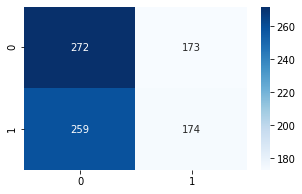

In [86]:
#classification report
#predict on test
y_predictGB = model_GB.predict(X_test_scaled)
conf_mat = confusion_matrix(y_test, y_predictGB)
df_conf_mat = pd.DataFrame(conf_mat)
plt.figure(figsize = (5,3))
sns.heatmap(df_conf_mat, annot=True,cmap='Blues', fmt='g')

In [87]:
#Classification Report:
clf_report = classification_report(y_test,y_predictGB)
print(clf_report)

              precision    recall  f1-score   support

        -1.0       0.51      0.61      0.56       445
         1.0       0.50      0.40      0.45       433

    accuracy                           0.51       878
   macro avg       0.51      0.51      0.50       878
weighted avg       0.51      0.51      0.50       878



- Train score is 85% but test is just 50%
- Class -1is being predicted better yet again
- Class 1 has less recall & f1 score yet again

In [88]:
# grid searching key hyperparameters for gradient boosting
model = GradientBoostingClassifier()
# define the grid of values to search
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
grid['subsample'] = [0.5, 0.7, 1.0]
grid['max_depth'] = [3, 7, 9]
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
# execute the grid search
X_scaled = StandardScaler().fit_transform(Xs)
grid_result = grid_search.fit(X_scaled, Ys)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.664394 using {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.5}
0.543942 (0.054608) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.5}
0.545761 (0.052302) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.7}
0.542778 (0.042967) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 1.0}
0.605037 (0.028743) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.5}
0.603663 (0.029829) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.7}
0.589991 (0.029271) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
0.608339 (0.034529) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.5}
0.606848 (0.032582) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
0.591243 (0.029731) with: {'learning_rate': 0.0001,

## `Final Best Model - Gradient Boosting`

In [112]:
# Tuned GB Model
model = GradientBoostingClassifier(loss='deviance',
                                    learning_rate=0.1,
                                    n_estimators=100,
                                    subsample=0.5,
                                    max_depth=3,
                                    random_state=7,
                                    verbose=1,
                                    )
model_GB = model.fit(X_train_scaled, y_train)

# Accuracy
GB_Train = model_GB.score(X_train_scaled, y_train)
pred_GB =model_GB.predict(X_test_scaled)
acc_GB = accuracy_score(y_test, pred_GB)

print("Training Accuracy:",GB_Train)
print("Testing Accuracy:",acc_GB)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.3672           0.0116            4.84s
         2           1.3601           0.0080            4.69s
         3           1.3540           0.0047            4.71s
         4           1.3461           0.0075            4.64s
         5           1.3326           0.0080            4.58s
         6           1.3171           0.0060            4.55s
         7           1.3217           0.0039            4.49s
         8           1.3091           0.0044            4.43s
         9           1.3018           0.0055            4.41s
        10           1.3023           0.0083            4.34s
        20           1.2508          -0.0000            3.90s
        30           1.2055           0.0029            3.43s
        40           1.2084          -0.0004            2.94s
        50           1.1486          -0.0014            2.45s
        60           1.1604          -0.0001            1.96s
       

<AxesSubplot:>

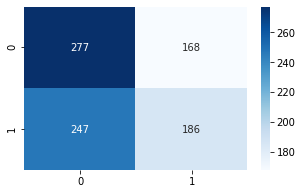

In [91]:
#classification report
#predict on test
y_predictGB = model_GB.predict(X_test_scaled)
conf_mat = confusion_matrix(y_test, y_predictGB)
df_conf_mat = pd.DataFrame(conf_mat)
plt.figure(figsize = (5,3))
sns.heatmap(df_conf_mat, annot=True,cmap='Blues', fmt='g')

In [92]:
#Classification Report:
clf_report = classification_report(y_test,y_predictGB)
print(clf_report)

              precision    recall  f1-score   support

        -1.0       0.53      0.62      0.57       445
         1.0       0.53      0.43      0.47       433

    accuracy                           0.53       878
   macro avg       0.53      0.53      0.52       878
weighted avg       0.53      0.53      0.52       878



- We have achieved somewhat balanced score between Train & Test
- Train score is less compared to Ada Boosting but Test score is better

**Pipleline - Scaling,PCA=0.95,Gradient Boosting Model**

In [258]:
pipe_lr = Pipeline([('scl', StandardScaler()), ('pca', PCA(n_components = 0.95)), 
                    ('clf', GradientBoostingClassifier(loss='deviance',
                                    learning_rate=0.1,
                                    n_estimators=100,
                                    subsample=0.5,
                                    max_depth=3,
                                    random_state=7,
                                    verbose=1,
                                    ))]) 
pipe_lr.fit(X_train_scaled, y_train) 
print('Test Accuracy: %.3f' % pipe_lr.score(X_test_scaled, y_test))

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.3672           0.0116            0.19s
         2           1.3601           0.0080            0.15s
         3           1.3540           0.0047            0.16s
         4           1.3461           0.0075            0.14s
         5           1.3326           0.0080            0.15s
         6           1.3171           0.0060            0.14s
         7           1.3217           0.0039            0.15s
         8           1.3091           0.0044            0.14s
         9           1.3018           0.0055            0.14s
        10           1.3023           0.0083            0.13s
        20           1.2508          -0.0000            0.11s
        30           1.2055           0.0029            0.09s
        40           1.2084          -0.0004            0.08s
        50           1.1486          -0.0014            0.06s
        60           1.1604          -0.0001            0.05s
       

### `Different sample populations on Gradient Boosting Method`

In [260]:
temp=Xs.copy()
temp['Pass_Fail']=Ys.copy()
values=temp.values

# configure bootstrap
n_iterations = 25            # Number of bootstrap samples to create
n_size = int(len(Xs) * 0.50)    # picking only 50 % of the given data in every bootstrap sample

scores=[]
# run bootstrap
stats = list()
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    #fit model
    model = GradientBoostingClassifier(loss='deviance',
                                    learning_rate=0.1,
                                    n_estimators=100,
                                    subsample=0.5,
                                    max_depth=3,
                                    random_state=7,
                                    )

    model.fit(train[:,:-1], train[:,-1])
    # evaluate model
    predictions = model.predict(test[:,:-1])
    score = accuracy_score(test[:,-1], predictions)    # caution, overall accuracy score can mislead when classes are imbalanced
    #print(score)
    stats.append(score)

In [239]:
#Avg score
print('Avg Accuracy: %.3f Std: (%.3f)' % (np.mean(stats), np.std(stats)))

Avg Accuracy: 0.653 Std: (0.011)


- Avg score isn't much changed with different sample populations.

## `All supervised models with KFold - Cross-validation`

>LogisticRegression: ideal=0.564, cv=0.566
>RidgeClassifier: ideal=0.562, cv=0.566
>KNeighborsClassifier: ideal=0.645, cv=0.647
>DecisionTreeClassifier: ideal=0.600, cv=0.596
>LinearSVC: ideal=0.549, cv=0.565
>SVC: ideal=0.581, cv=0.581
>GaussianNB: ideal=0.558, cv=0.561
>AdaBoostClassifier: ideal=0.619, cv=0.610
>BaggingClassifier: ideal=0.604, cv=0.598
>RandomForestClassifier: ideal=0.600, cv=0.596
>GradientBoostingClassifier: ideal=0.670, cv=0.658
Correlation: 0.988


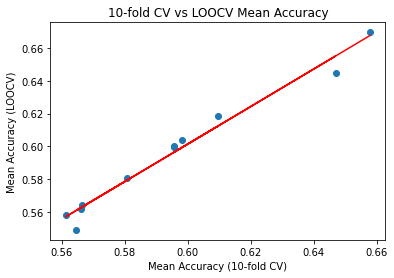

In [237]:
# get a list of models to evaluate
def get_models():
    models = list()
    models.append(LogisticRegression())
    models.append(RidgeClassifier())
    models.append(KNeighborsClassifier())
    models.append(DecisionTreeClassifier())
    models.append(LinearSVC())
    models.append(SVC())
    models.append(GaussianNB())
    models.append(AdaBoostClassifier())
    models.append(BaggingClassifier())
    models.append(RandomForestClassifier())
    models.append(GradientBoostingClassifier())
    return models

# evaluate the model using a given test condition
def evaluate_model(cv, model):

    # evaluate the model
    scores = cross_val_score(model, X_scaled, Ys, scoring='accuracy', cv=cv, n_jobs=-1)
    # return scores
    return mean(scores)

# define test conditions
ideal_cv = LeaveOneOut()
cv = KFold(n_splits=10, shuffle=True, random_state=7)
# get the list of models to consider
models = get_models()
# collect results
ideal_results, cv_results = list(), list()
# evaluate each model
for model in models:
    # evaluate model using each test condition
    cv_mean = evaluate_model(cv, model)
    ideal_mean = evaluate_model(ideal_cv, model)
    # check for invalid results
    if isnan(cv_mean) or isnan(ideal_mean):
        continue
    # store results
    cv_results.append(cv_mean)
    ideal_results.append(ideal_mean)
    # summarize progress
    print('>%s: ideal=%.3f, cv=%.3f' % (type(model).__name__, ideal_mean, cv_mean))
# calculate the correlation between each test condition
corr, _ = pearsonr(cv_results, ideal_results)
print('Correlation: %.3f' % corr)
# scatter plot of results
pyplot.scatter(cv_results, ideal_results)
# plot the line of best fit
coeff, bias = polyfit(cv_results, ideal_results, 1)
line = coeff * asarray(cv_results) + bias
pyplot.plot(cv_results, line, color='r')
# label the plot
pyplot.title('10-fold CV vs LOOCV Mean Accuracy')
pyplot.xlabel('Mean Accuracy (10-fold CV)')
pyplot.ylabel('Mean Accuracy (LOOCV)')
# show the plot
pyplot.show()

- The difference between Train & Test scores using CV=10 cross-validation is very less. 

## `Comparing all Supervised Models Scores`

In [119]:
# Comparison table

Comparison1 = pd.DataFrame({'Method':['Logistic Regression'], 'Train accuracy': LR_score_train, 
                           'Test accuracy': LR_score_test})
Comparison1 = Comparison1[['Method', 'Train accuracy', 'Test accuracy']]


Comparison2 = pd.DataFrame({'Method':['Naive Bayes Regression'], 'Train accuracy': NB_Accuracy_Train, 
                           'Test accuracy': NB_Accuracy_Test},)
Comparison2 = Comparison2[['Method', 'Train accuracy', 'Test accuracy']]


Comparison3 = pd.DataFrame({'Method':['KNN'], 'Train accuracy': KNN_Accuracy_Train, 
                           'Test accuracy': KNN_Accuracy_Test})
Comparison3 = Comparison3[['Method', 'Train accuracy', 'Test accuracy']]


Comparison4 = pd.DataFrame({'Method':['SVM'], 'Train accuracy': DT_Train, 
                           'Test accuracy': DT_Test})
Comparison4 = Comparison4[['Method', 'Train accuracy', 'Test accuracy']]


Comparison5 = pd.DataFrame({'Method':['Decision Tree'], 'Train accuracy': LR_score_train, 
                            'Test accuracy': LR_score_test})
Comparison5 = Comparison5[['Method', 'Train accuracy', 'Test accuracy']]



Comparison6 = pd.DataFrame({'Method':['Random Forest'], 'Train accuracy': RF_Train, 
                           'Test accuracy': RF_Test})
Comparison6 = Comparison6[['Method', 'Train accuracy', 'Test accuracy']]


Comparison7 = pd.DataFrame({'Method':['Gradient Boosting'], 'Train accuracy': GB_Train, 
                           'Test accuracy': acc_GB})
Comparison7 = Comparison8[['Method', 'Train accuracy', 'Test accuracy']]



Comparison8 = pd.DataFrame({'Method':['ADA Boosting'], 'Train accuracy': AB_Train, 
                           'Test accuracy': acc_AB})
Comparison8 = Comparison9[['Method', 'Train accuracy', 'Test accuracy']]

Comparison = pd.concat([Comparison1, Comparison2,Comparison3,Comparison4,Comparison5,Comparison6,
                        Comparison7,Comparison8])

Comparison

Method  Train accuracy  Test accuracy
0     Logistic Regression        0.573242       0.542141
0  Naive Bayes Regression        0.571777       0.542141
0                     KNN        0.692383       0.560364
0                     SVM        0.729004       0.531891
0           Decision Tree        0.573242       0.542141
0           Random Forest        0.676270       0.556948
0       Gradient Boosting        0.746094       0.527335
0            ADA Boosting        0.982910       0.506834

- We have very weak learners in the data. So much of irrelavent info+noise is captured.
- So boosting is needed. And we see AdaBoost is very effective on Train data & underfit on test data.
- Gradient boost has decent scores both on Train data & test data
- Gradient Boosting is best for this dataset

**Gradient Boosting**
Gradient Boosting for classification. GB builds an additive model in forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage n_classes_ regression trees are fit on the negative gradient of the binomial or multinomial deviance loss function. Binary classification is a special case where only a single regression tree is induced.

## `Pickle the model`

In [121]:
import pickle    # Job lib , json
Pickled_model = pickle.dumps(model_GB) 
print("\nCompleted pickling the model")

print("\nReload the pickled model")
Pickled_Load = pickle.loads(Pickled_model)

y_pred_1 = Pickled_Load.predict(X_test_scaled)


Completed pickling the model

Reload the pickled model


## `Future Data`

In [128]:
FutureData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Columns: 534 entries, 0 to 585
dtypes: float64(402), int64(132)
memory usage: 75.2 KB


In [170]:
FutureData.columns.map(type)

Index([<class 'str'>, <class 'int'>, <class 'int'>, <class 'int'>,
       <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>,
       <class 'int'>, <class 'int'>,
       ...
       <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>,
       <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>,
       <class 'int'>, <class 'int'>],
      dtype='object', length=591)

In [172]:
FutureData.columns = FutureData.columns.astype(str)
FutureData.columns.map(type)

Index([<class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>,
       ...
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>],
      dtype='object', length=591)

In [173]:
for i in FutureData.columns:
    FutureData.rename(columns={i: 'col_'+i}, inplace=True)
FutureData.columns

Index(['col_DateTime', 'col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5',
       'col_6', 'col_7', 'col_8',
       ...
       'col_580', 'col_581', 'col_582', 'col_583', 'col_584', 'col_585',
       'col_586', 'col_587', 'col_588', 'col_589'],
      dtype='object', length=591)

In [175]:
FutureData = FutureData.drop("col_DateTime",axis=1)

In [216]:
array1 = FutureData.columns
array2 = Xs.columns
array3=np.intersect1d(array1, array2)

In [224]:
temp=pd.DataFrame()
for i in array3:
    temp[i] = FutureData[i]

In [225]:
Xs.shape, FutureData.shape, temp.shape

((2926, 246), (18, 590), (18, 246))

In [227]:
temp.fillna(0, inplace=True)

**Predicting using Pickled Model**

In [228]:
X_scaled2 = StandardScaler().fit_transform(temp)
y_pred_1 = Pickled_Load.predict(X_scaled2)

In [229]:
y_pred_1

array([ 1., -1., -1.,  1.,  1.,  1.,  1., -1.,  1., -1., -1.,  1., -1.,
       -1., -1., -1., -1.,  1.])

In [232]:
np.unique(y_pred_1,return_counts=True)

(array([-1.,  1.]), array([10,  8], dtype=int64))

## `6. Conclusion and improvisation:`

- Write your conclusion on the results.

#### `Conclusions`

- Data quality is poor. It consists of too many irrelavent features along with noise.
- Data has way too many null cells (41951), features (538 out of 591). So difficult to build efficient ML model.
- Data has null rows(all 0's) is almost 100. So practicly difficult to chose Imputing strategy without bias. 
- It has effected by outliers highly.
- It can be genarated at high speed as is captured by sensors. Mostly overwhelming in quantity.
- Target classes is imbalanced highly (94%-6%), so the model will be baised & even after resampling, it wouldn't be much effective.
- Low variety data as it has only signal numbers, no other types captured.
- High velocity than required & redundant features as there are aroud 200 features has high correlation with other features.
- Real time data is being captured, unreliable with lots of noise.
